# Pràctica 1 - Xarxes Neuronals i Deep Learning
#### Document realitzat pels alumnes Pau Prat i Violeta Bonet, del grau en Inteligència Artificial (UPC).
En primer lloc, cal destacar que aquesta primera cel·la conté tots els mòduls i llibreries necessàries per a l'execució del codi. 

Per tant, en cas de no tenir-les, caldrà executar aquesta cel·la prèviament.

In [1]:
'''
%pip install --upgrade pip  --quiet
%pip install pandas  --upgrade --quiet
%pip install numpy  --upgrade --quiet
%pip install scipy  --upgrade --quiet
%pip install statsmodels  --upgrade --quiet
%pip install seaborn  --upgrade --quiet
%pip install scikit-learn==1.3.0
%pip install tqdm ipykernel matplotlib ipywidgets --upgrade --quiet   
%pip install plotly numpy==1.25 nbformat umap-learn
%pip install ucimlrepo
%pip install mlxtend
%pip install pydotplus
%pip install imbalanced-learn
%pip install yellowbrick
%pip install missingno
%pip install tensorflow
%load_ext autoreload
%pip install scikeras
'''

'\n%pip install --upgrade pip  --quiet\n%pip install pandas  --upgrade --quiet\n%pip install numpy  --upgrade --quiet\n%pip install scipy  --upgrade --quiet\n%pip install statsmodels  --upgrade --quiet\n%pip install seaborn  --upgrade --quiet\n%pip install scikit-learn==1.3.0\n%pip install tqdm ipykernel matplotlib ipywidgets --upgrade --quiet   \n%pip install plotly numpy==1.25 nbformat umap-learn\n%pip install ucimlrepo\n%pip install mlxtend\n%pip install pydotplus\n%pip install imbalanced-learn\n%pip install yellowbrick\n%pip install missingno\n%pip install tensorflow\n%load_ext autoreload\n%pip install scikeras\n'

Imports bàsics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Definim la mida predeterminada dels gràfics.

In [3]:
plt.rcParams['figure.figsize'] = [9, 6]  

plt.rcParams['font.size'] = 14

sns.set(font_scale=1)

# 1. Anàlisi Exploratòria de Dades (EDA)

#### <span style="color:lightgreen"> Carreguem la base de dades</span>

In [4]:
df = pd.read_csv("smartphone_data.csv")

df.shape

(980, 25)

In [5]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [6]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


#### <span style="color:lightgreen"> Classificació de variables en numèriques i categòriques</span>

Creem una funció que retorni una llista de variables numèriques, una llista de variables categòriques, i un Dataframe per visualitzar els resultats de la classifiació

Cal remarcar que la variable objectiu la tractarem de manera diferent (missings, outliers, etc.), per la qual cosa no serà classificada en cap d'aquestes llistes

In [7]:
def classify_features(df, target): 
    initial_numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    initial_categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    numerical_features = []
    categorical_features = initial_categorical_features  

    for column in initial_numerical_features:
        if column != target:
            if df[column].nunique() < 10:
                categorical_features.append(column) 
            else:
                numerical_features.append(column)  

    def feature_type(column):
        if column in numerical_features:
            return 'Numerical'
        elif column in categorical_features:
            return 'Categorical'
        else:
            return 'Boolean'

    features = pd.DataFrame({
        'Feature': [column for column in df.columns if column != 'price'],
        'Type': [df[column].dtype for column in df.columns if column != 'price'],
        'Unique values': [df[column].nunique() for column in df.columns if column != 'price'],
        'Category': [feature_type(column) for column in df.columns if column != 'price']
    })

    features.sort_values(by='Unique values', ascending=True, inplace=True)
    return numerical_features, categorical_features, features

numerical_features, categorical_features, features = classify_features(df, 'price')

features

,Feature,Type,Unique values,Category
18,num_front_cameras,float64,2,Categorical
22,extended_memory_available,int64,2,Categorical
3,has_5g,bool,2,Boolean
4,has_nfc,bool,2,Boolean
5,has_ir_blaster,bool,2,Boolean
10,fast_charging_available,int64,2,Categorical
7,num_cores,float64,3,Categorical
19,os,object,3,Categorical
17,num_rear_cameras,int64,4,Categorical
15,refresh_rate,int64,6,Categorical


Convertim les variables marcades com a booleanes a categòriques

In [8]:
for variable in ['has_5g', 'has_nfc', 'has_ir_blaster']:
    df[variable] = df[variable].map({True: 1, False: 0})

In [9]:
numerical_features, categorical_features, features = classify_features(df, 'price')

features

,Feature,Type,Unique values,Category
18,num_front_cameras,float64,2,Categorical
22,extended_memory_available,int64,2,Categorical
3,has_5g,int64,2,Categorical
4,has_nfc,int64,2,Categorical
5,has_ir_blaster,int64,2,Categorical
10,fast_charging_available,int64,2,Categorical
7,num_cores,float64,3,Categorical
19,os,object,3,Categorical
17,num_rear_cameras,int64,4,Categorical
15,refresh_rate,int64,6,Categorical


Com podem veure, la variable categòrica 'model' té 980 valors únics, ja que es tracta del model específic de cada smartphone.

Degut a aquest nombre tant elevat de categories, decidim eliminar-lo del dataset per reduir la complexitat (i possible overfitting) dels models predictius.

In [10]:
# Eliminar 'model' de la llista de variables categòriques i de 'df'
categorical_features.remove('model')
df.drop('model', axis=1, inplace=True)

#### <span style="color:lightgreen"> Visualitzem la distribució de cada variable numèrica</span>

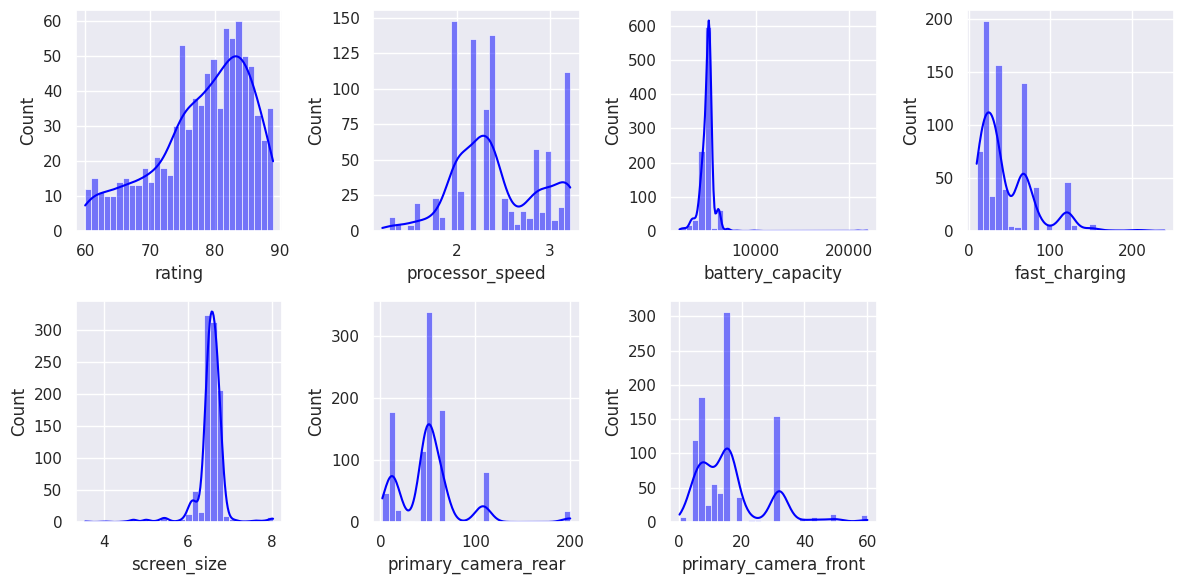

In [11]:
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize = (12, 6))
axes = axes.flatten()

for i, ax in enumerate(axes[:len(numerical_features)]):
    sns.histplot(df[numerical_features[i]], bins = 30, color = 'blue', edgecolor = 'white', kde = True, ax = ax)

# Eliminar els subplots sobrants
for ax in axes[len(numerical_features):]:
    fig.delaxes(ax)

plt.tight_layout()
#plt.savefig('./plots/num_dist.png')

En cas que es vulgui obtenir el gràfic de la distribució de cada variable numèrica per separat, simplement cal descomentar i executar la següent cel·la.

In [12]:
'''for feature in numerical_features:
    mean = df[feature].mean()
    fig, ax = plt.subplots()
    sns.histplot(df[feature], kde=False, ax=ax, edgecolor="black")
    ax.plot([mean], [-0.6], marker='^', markersize=9, color="red")
    ax.set_title(f'Distribució de {feature}')
    ax.set_xlabel(feature, size=10)
    ax.set_ylabel("Freqüència", size=10)
    plt.tight_layout()
    #plt.savefig(f'./plots/{feature}_distribution.png')'''

'for feature in numerical_features:\n    mean = df[feature].mean()\n    fig, ax = plt.subplots()\n    sns.histplot(df[feature], kde=False, ax=ax, edgecolor="black")\n    ax.plot([mean], [-0.6], marker=\'^\', markersize=9, color="red")\n    ax.set_title(f\'Distribució de {feature}\')\n    ax.set_xlabel(feature, size=10)\n    ax.set_ylabel("Freqüència", size=10)\n    plt.tight_layout()\n    #plt.savefig(f\'./plots/{feature}_distribution.png\')'

#### <span style="color:lightgreen"> Histograma de la freqüència per classe de cada variable categòrica </span>

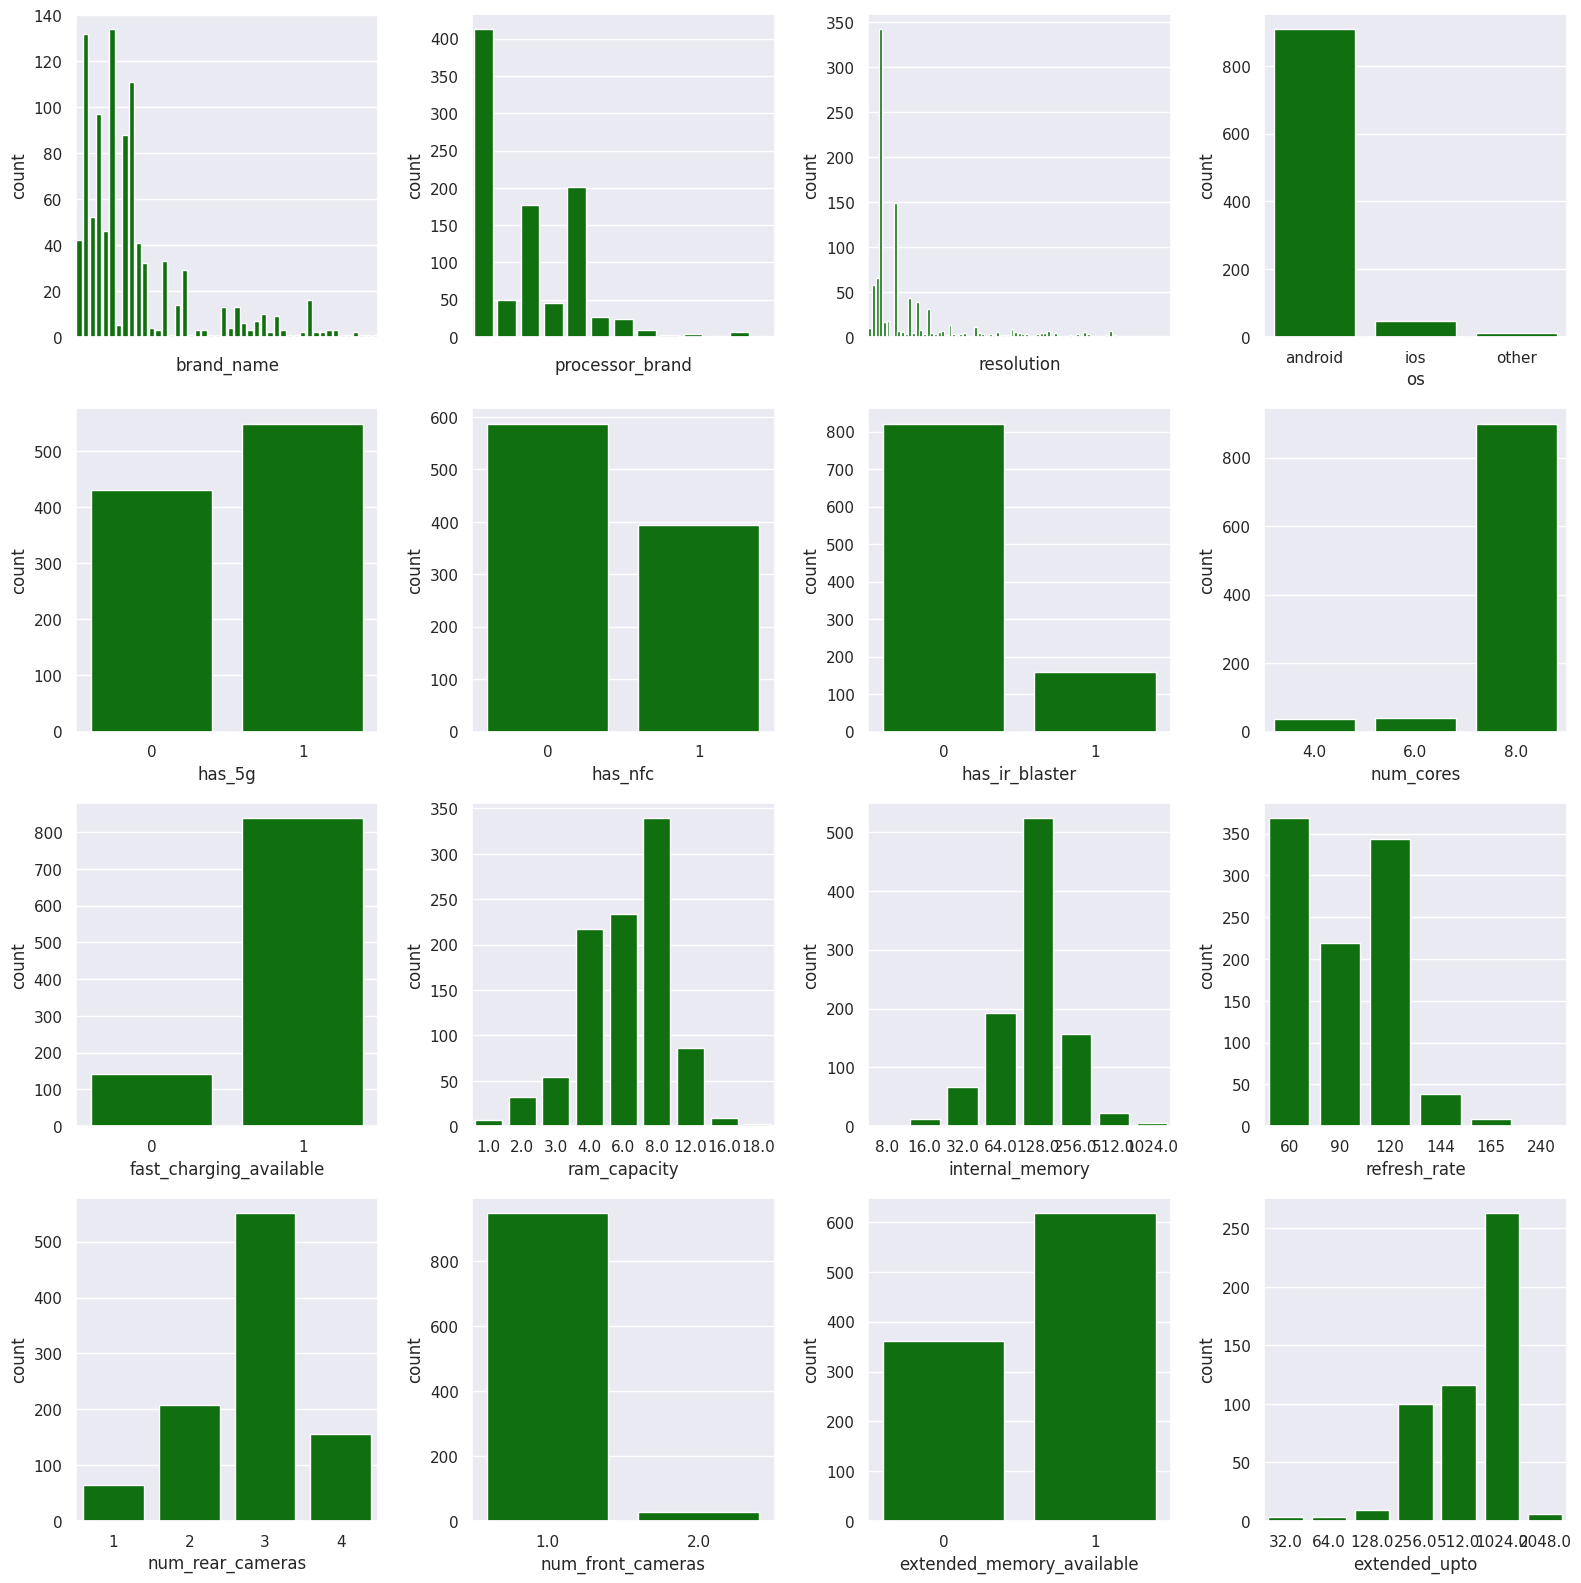

In [13]:
fig, axes = plt.subplots(4, 4, figsize = (16, 16))
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.countplot(data = df, x = categorical_features[i], color = 'green', ax = ax)
    if categorical_features[i] in ['resolution', 'processor_brand', 'brand_name']:
        ax.set_xticklabels([])  

plt.tight_layout()
#plt.savefig('./plots/hist_freq.png')

En cas que es vulgui obtenir el gràfic de la freqüència per classe de cada variable categòrica per separat, simplement cal descomentar i executar la següent cel·la.

In [14]:
'''for feature in categorical_features:
    plt.figure()
    df[feature].value_counts().plot(kind='bar', color='green')
    plt.title(f'Freqüència per classe - {feature}')
    if feature == 'resolution':
        plt.xticks(rotation=90, fontsize=8)  
    else:
        plt.xticks(rotation=70, fontsize=10)
    plt.tight_layout()
    #plt.savefig(f'./plots/{feature}_frequency.png')'''

"for feature in categorical_features:\n    plt.figure()\n    df[feature].value_counts().plot(kind='bar', color='green')\n    plt.title(f'Freqüència per classe - {feature}')\n    if feature == 'resolution':\n        plt.xticks(rotation=90, fontsize=8)  \n    else:\n        plt.xticks(rotation=70, fontsize=10)\n    plt.tight_layout()\n    #plt.savefig(f'./plots/{feature}_frequency.png')"

#### <span style="color:lightgreen"> Correlacions entre variables numèriques </span>

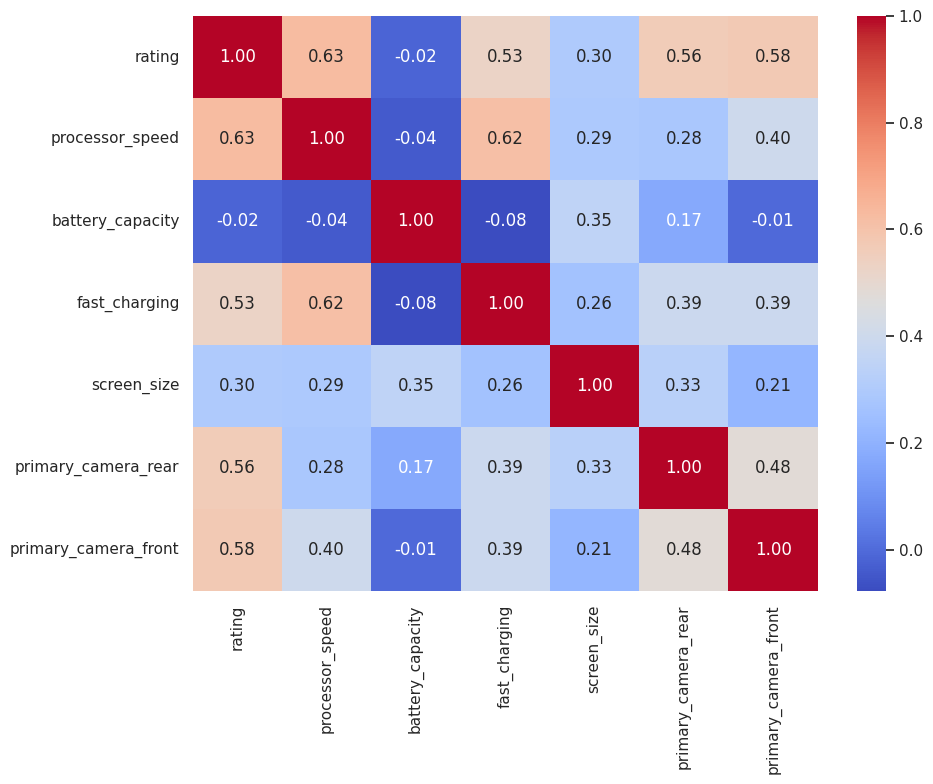

In [15]:
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.tight_layout()  
#plt.savefig('./plots/correlations_heatmap.png')
plt.show()

#### <span style="color:lightgreen"> Correlació entre variables categòriques i variable objectiu </span>

Primer de tot, com que la variable objectiu 'price' està en rúpies, la transformarem a euros, per una major interpreatbilitat i comprensió del conjunt de dades.


Per tant, convertim les unitats de 'price' a euros utilitzant el tipus de canvi vigent entre les rúpies i els euros en el moment de l'anàlisi, en què una rúpia índia equival a 0.011 euros.

In [16]:
# Multiplicar els valors de price per 0.011
df['price'] = df['price'] * 0.011

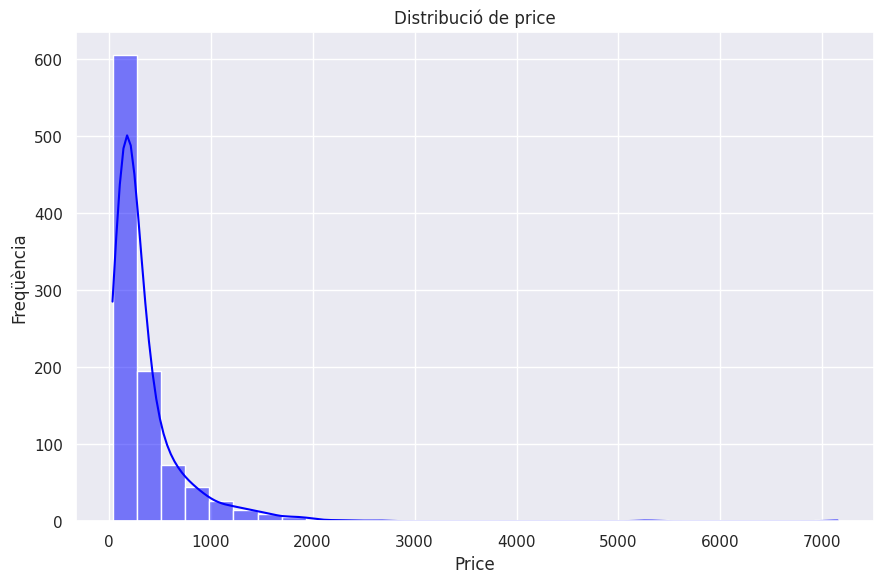

In [17]:
# Visualitzar la distribució de 'price'
plt.figure()
sns.histplot(df['price'], bins = 30, color = 'blue', edgecolor = 'white', kde = True)
plt.title('Distribució de price')
plt.xlabel('Price')
plt.ylabel('Freqüència')
plt.tight_layout()
#plt.savefig('./plots/price_distribution.png')

Veiem en el gràfic anterior que la variable objectiu conté molt outliers, per la qual cosa caldrà tractar-los posteriorment també per aquesta variable.

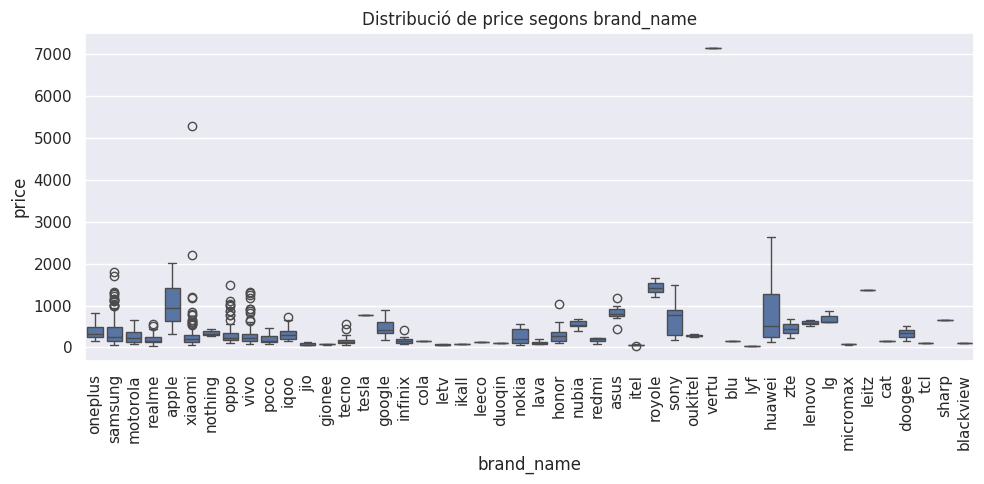

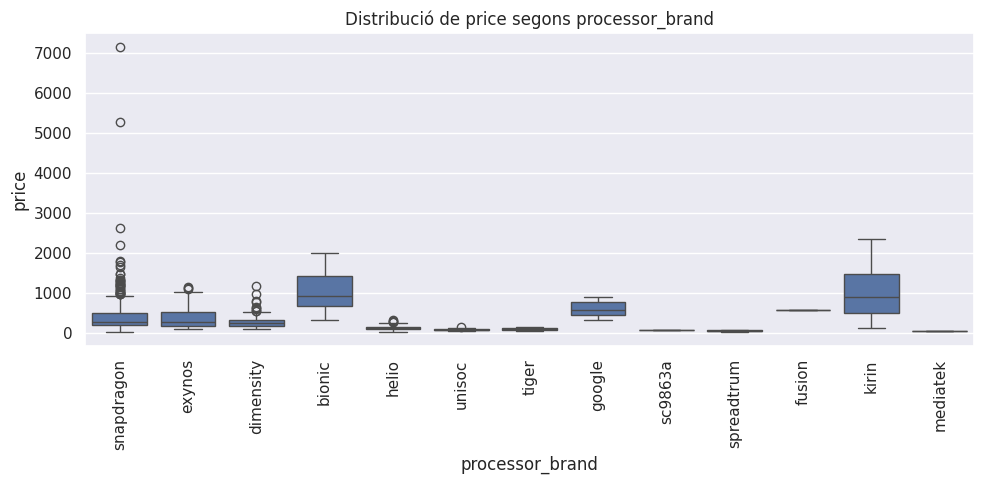

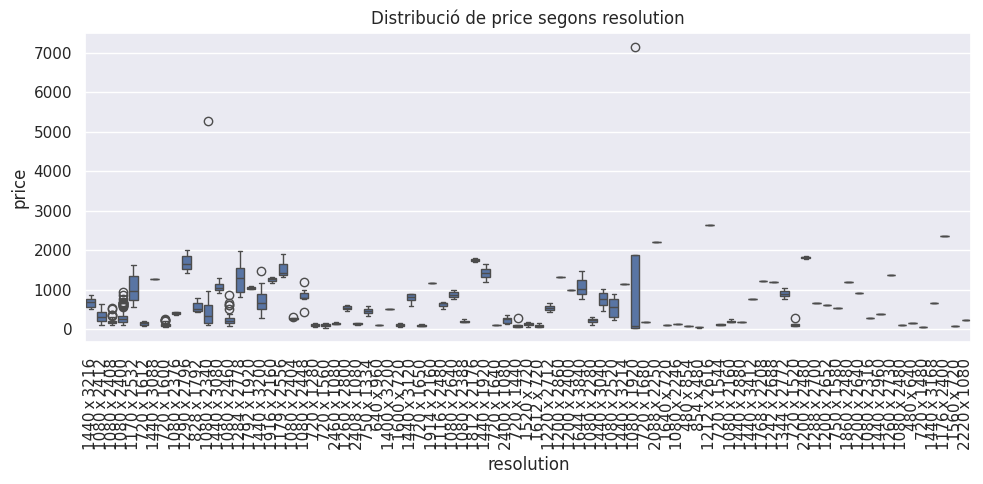

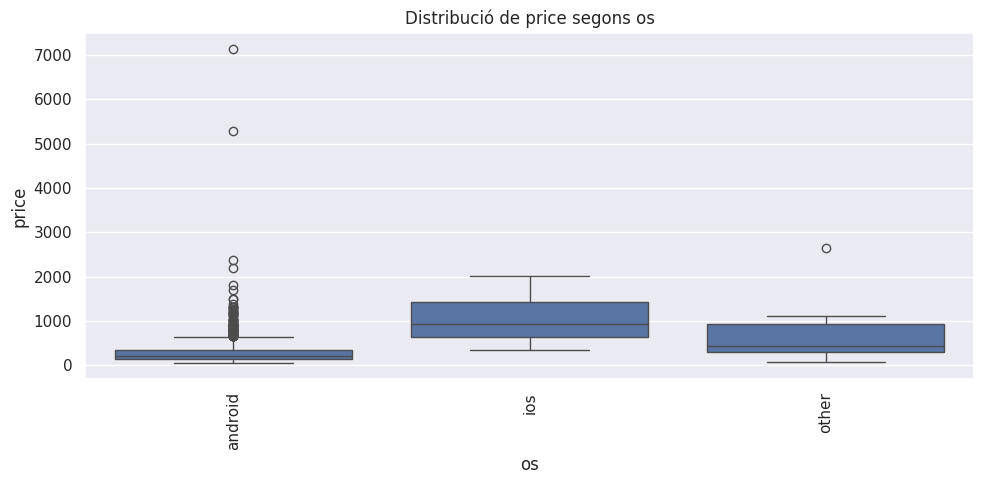

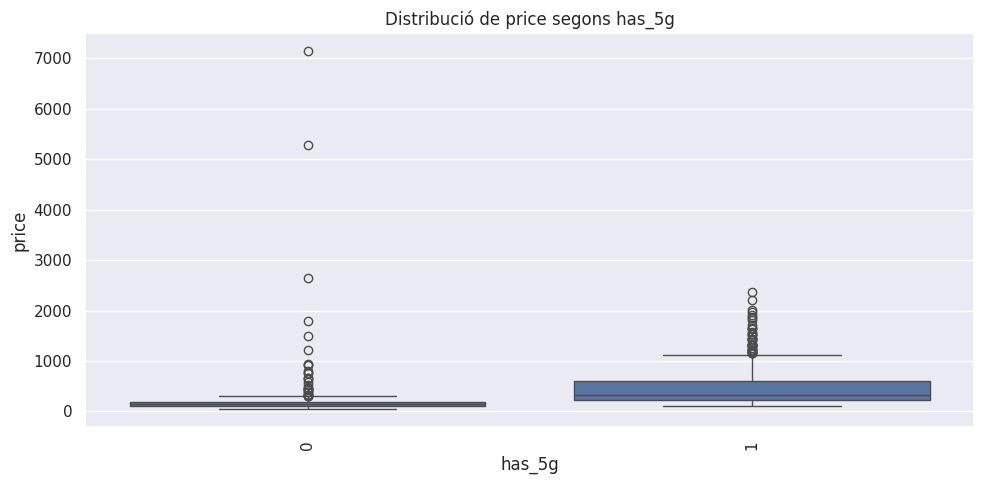

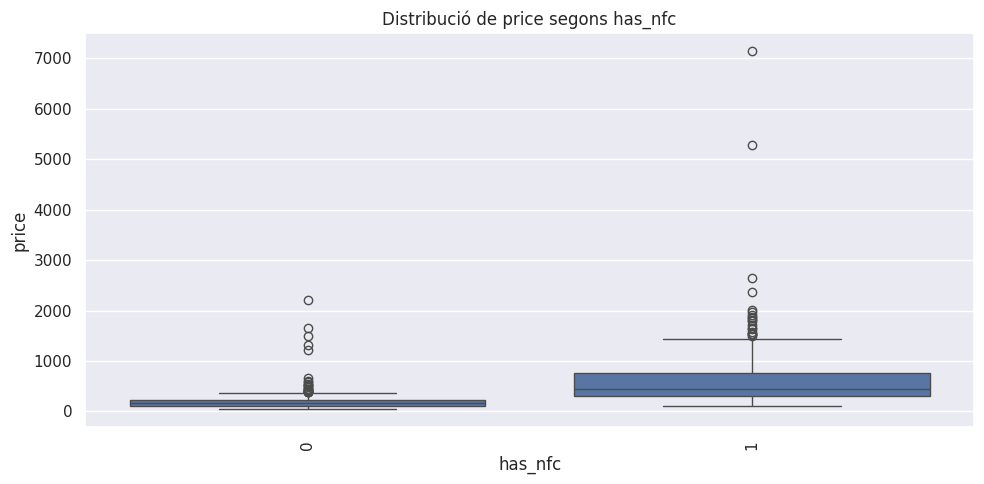

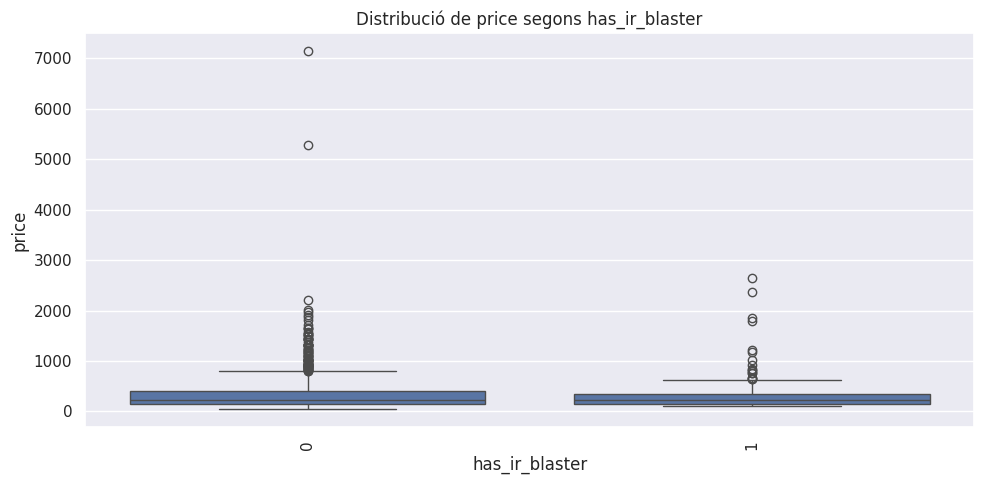

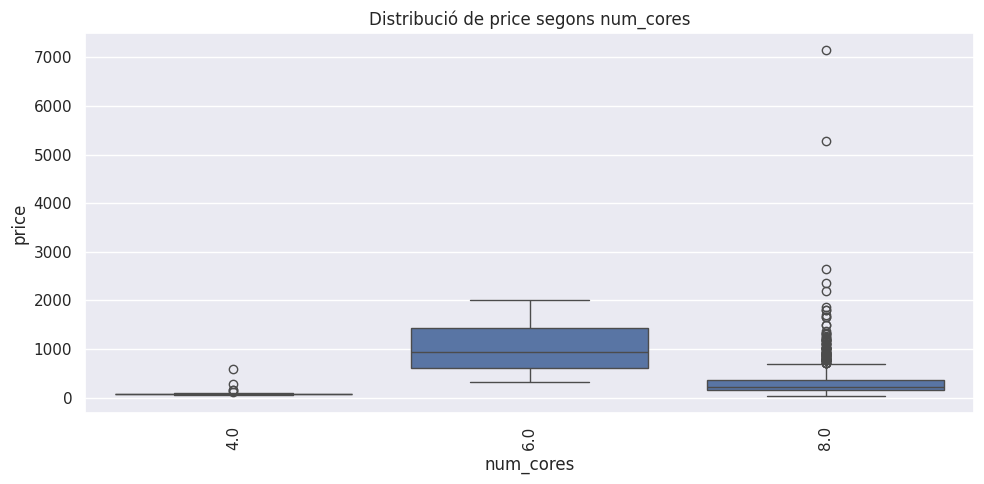

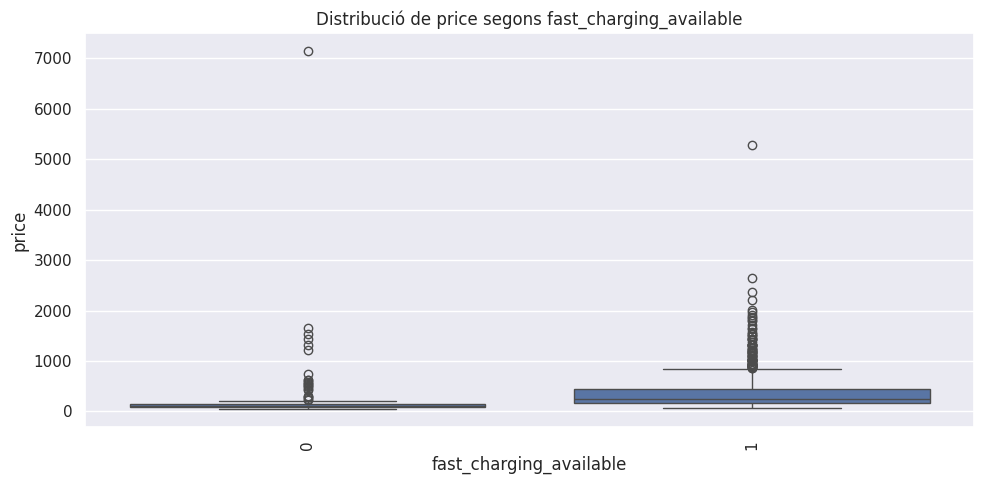

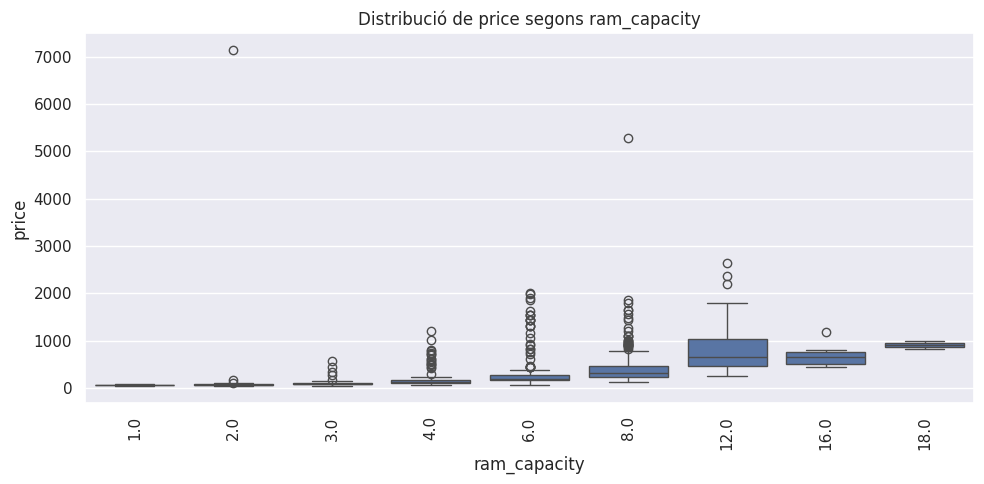

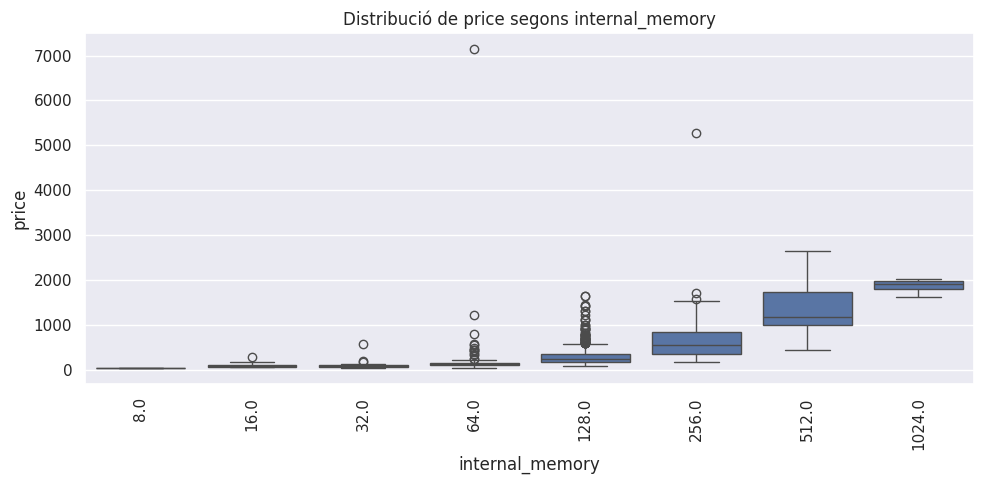

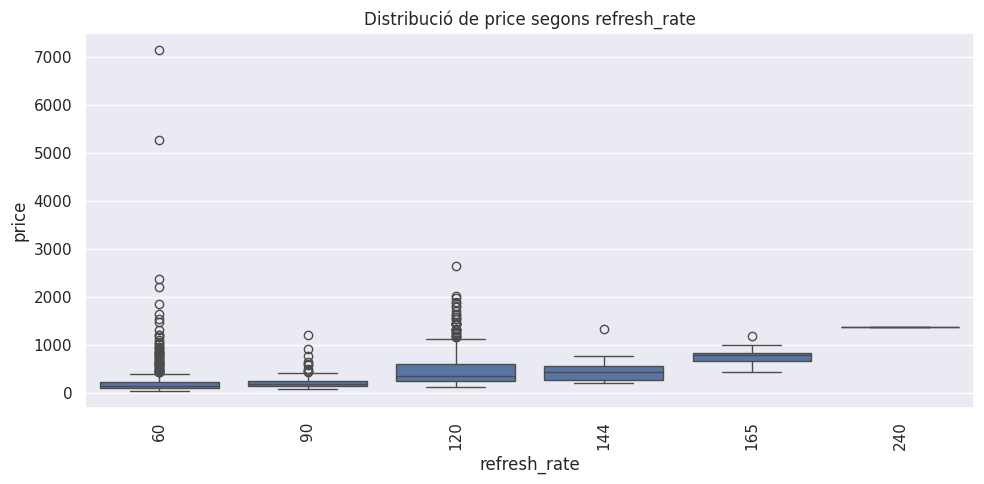

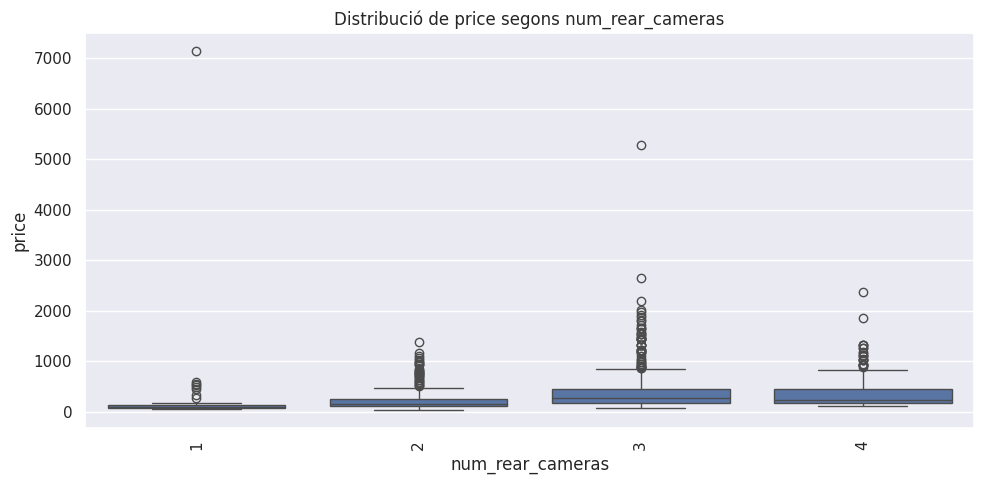

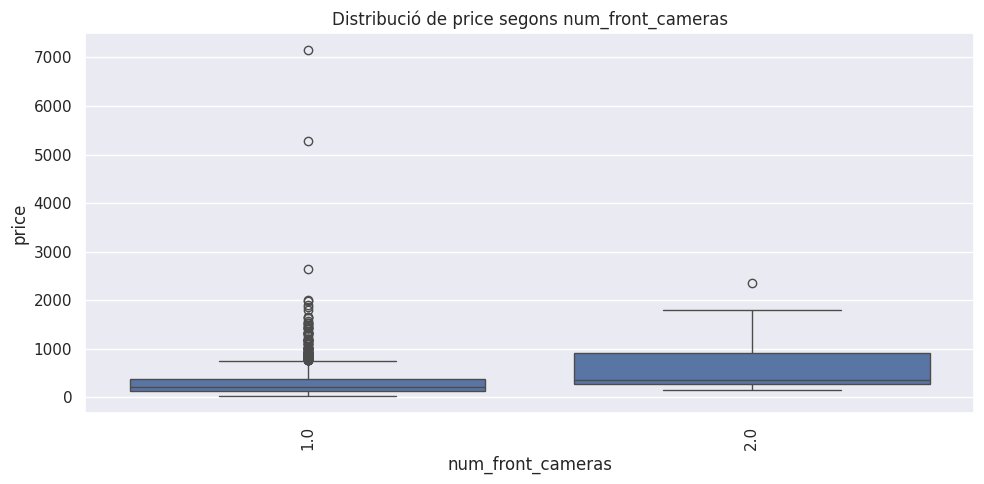

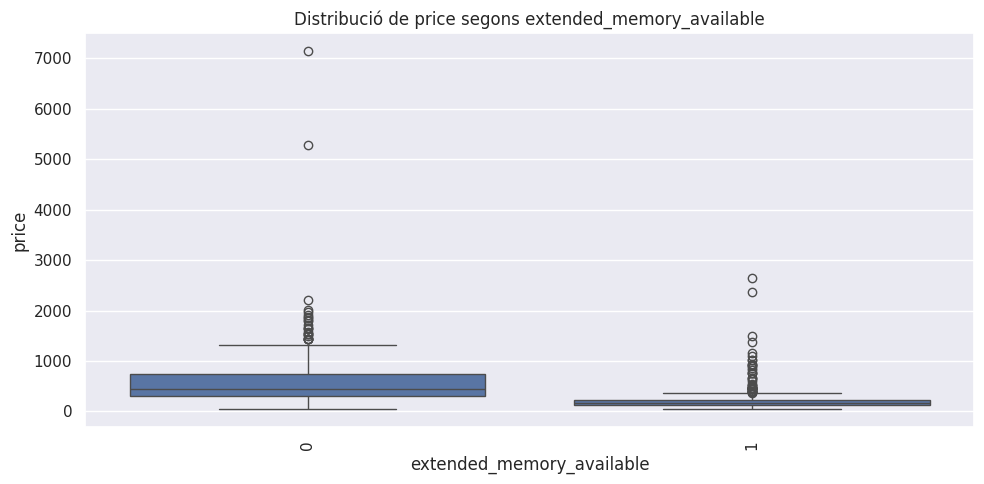

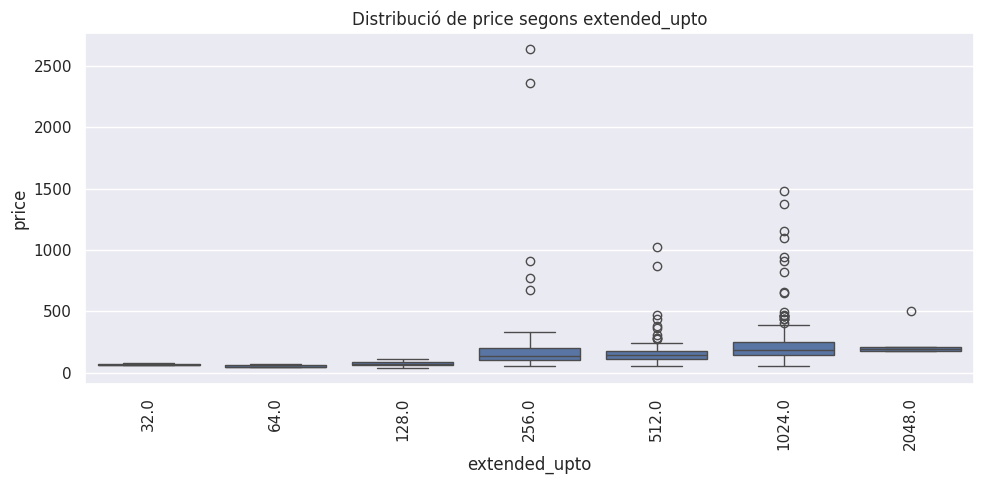

In [18]:
for i, feature in enumerate(categorical_features):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'Distribució de price segons {feature}')
    plt.xticks(rotation=90)
    plt.tight_layout()  
    #plt.savefig(f'./plots/boxplots/{feature}.png')  


#### <span style="color:lightgreen"> Correlació entre variables numèriques i variable objectiu </span>

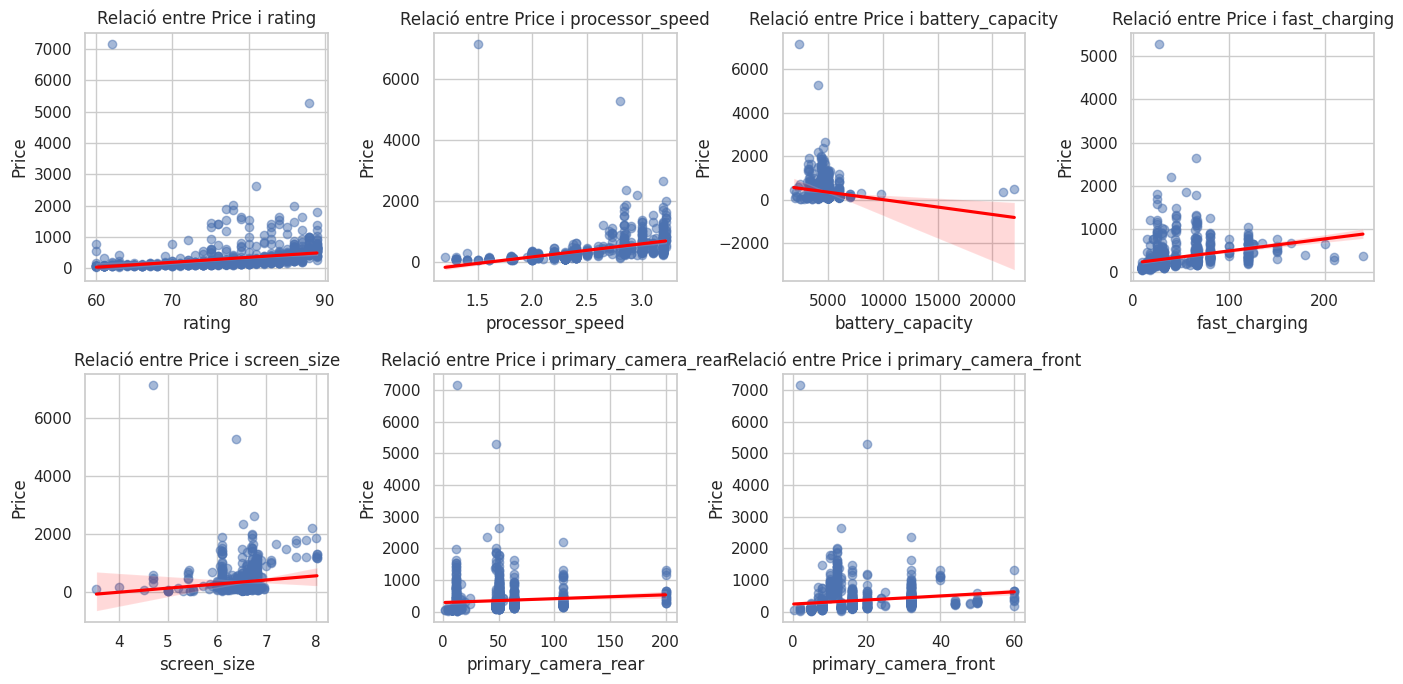

In [19]:
sns.set(style="whitegrid")

num_rows = 2
num_cols =  4

fig, axes = plt.subplots(num_rows, num_cols, figsize = (14, 7))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.regplot(x=feature, y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={"color": "red"}, ax=axes[i])  # alpha para transparencia de puntos
    axes[i].set_title(f'Relació entre Price i {feature}')  
    axes[i].set_xlabel(feature) 
    axes[i].set_ylabel('Price')  

# Eliminar els subplots sobrants
for ax in axes[len(numerical_features):]:
    fig.delaxes(ax)

plt.tight_layout()
#plt.savefig('./plots/numerical_correlations.png')
plt.show()

# 2. Preprocessament

#### <span style="color:lightgreen"> Missings </span>

/tmp/ipykernel_28621/2245220997.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 900x600 with 0 Axes>

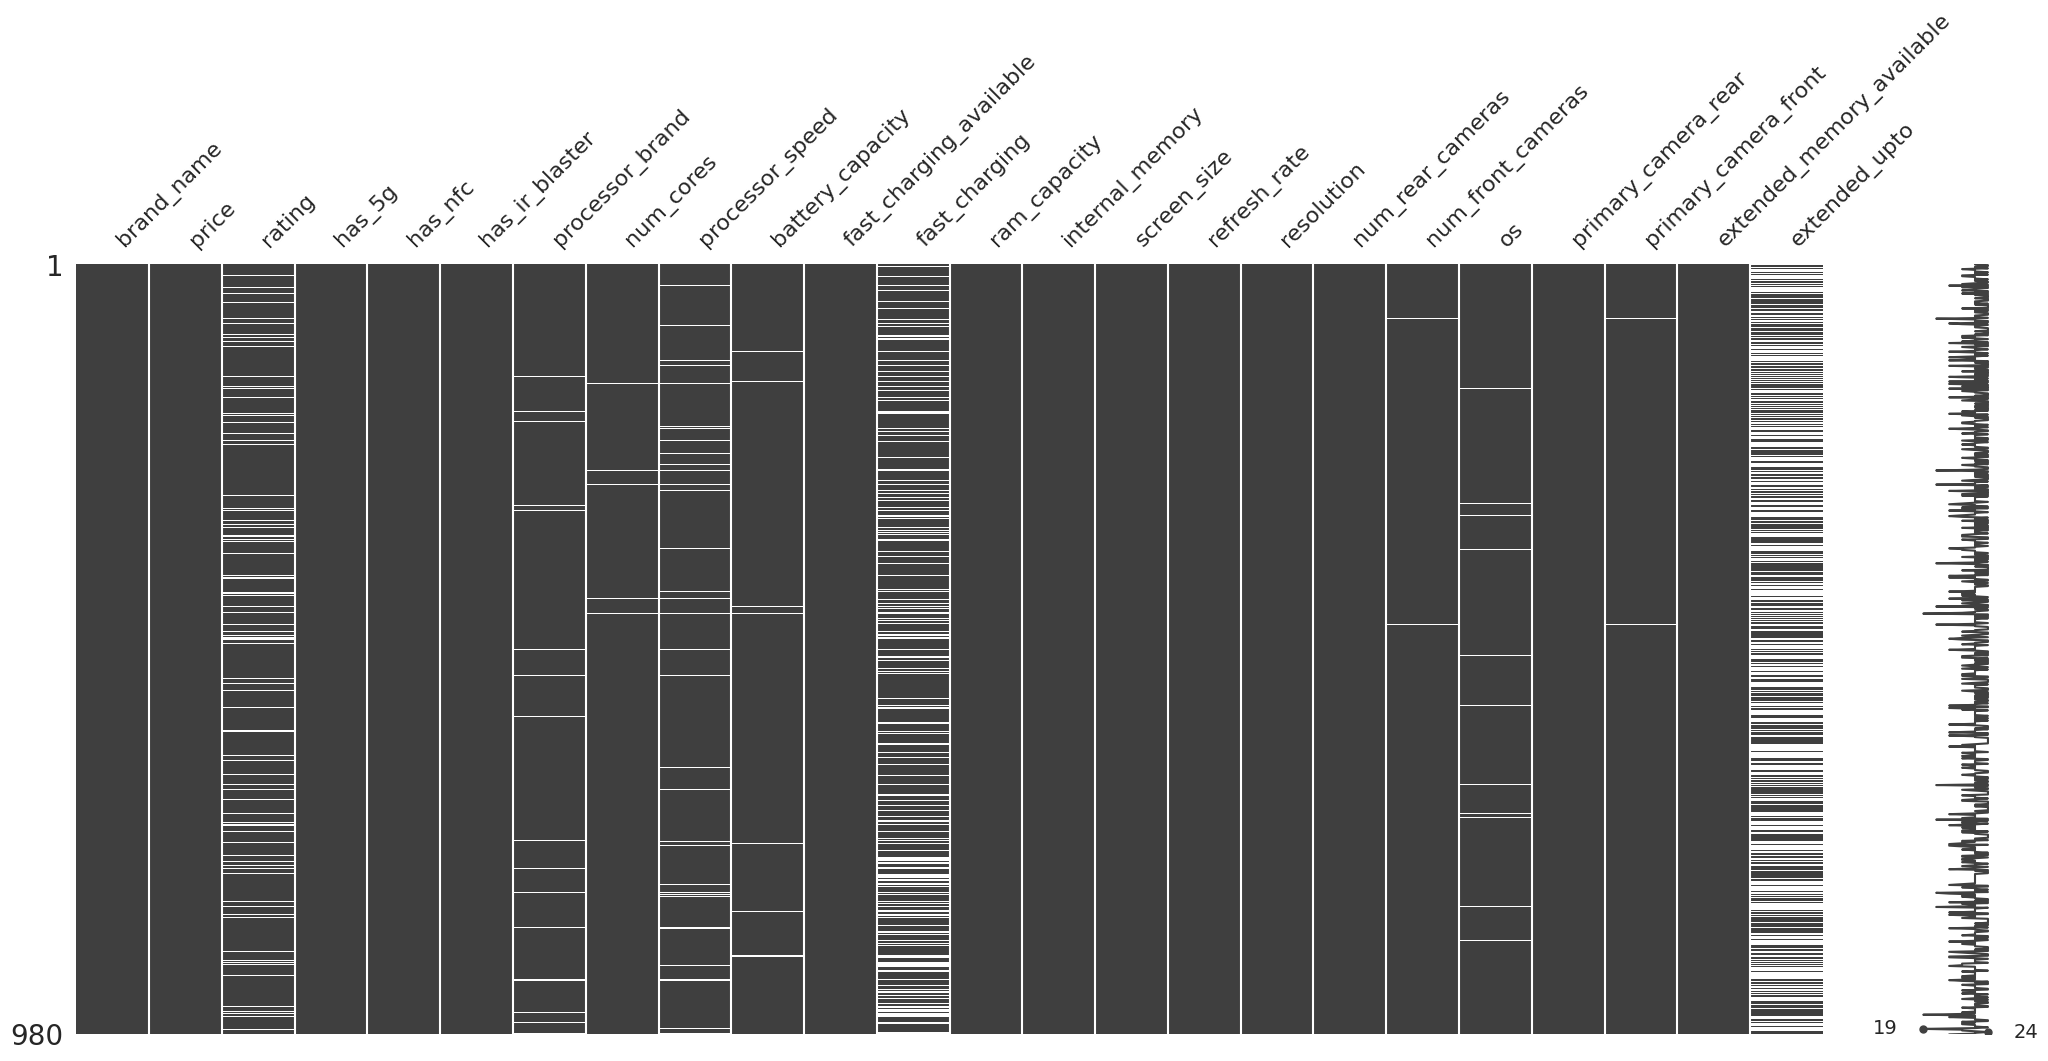

In [20]:
import missingno as msno

plt.figure()
msno.matrix(df)
plt.tight_layout()  
#plt.savefig('./plots/missingno_matrix.png')  

D'aquest gràfic ja podem obtenir molta informació sobre els missinigs de cada variable del dataset, però a continuació creem una funció per poder visualitzar en una taula els missings totals i el percentatge de missings que té cada variable diferent.

In [21]:
def missing_data(data):
    total_missing = data.isna().sum().sort_values(ascending=False)
    percent_missing = round(100 * (data.isnull().sum() / len(data)), 2).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Total Missing': total_missing, 'Percent Missing (%)': percent_missing})
    return missing_data
missing_data(df)

,Total Missing,Percent Missing (%)
extended_upto,480,48.98
fast_charging,211,21.53
rating,101,10.31
processor_speed,42,4.29
processor_brand,20,2.04
os,14,1.43
battery_capacity,11,1.12
num_cores,6,0.61
primary_camera_front,5,0.51
num_front_cameras,4,0.41


Eliminem 'extended_upto' ja que té gairebé un 50% de missings

In [22]:
categorical_features.remove('extended_upto')
df = df.drop('extended_upto', axis=1)

Els altres missings els imputarem un cop particionem el dataset en train i test

#### <span style="color:lightgreen"> Outliers </span>

En primer lloc, visualitzem la distribució de les variable numèriques abans de tractar els outliers.

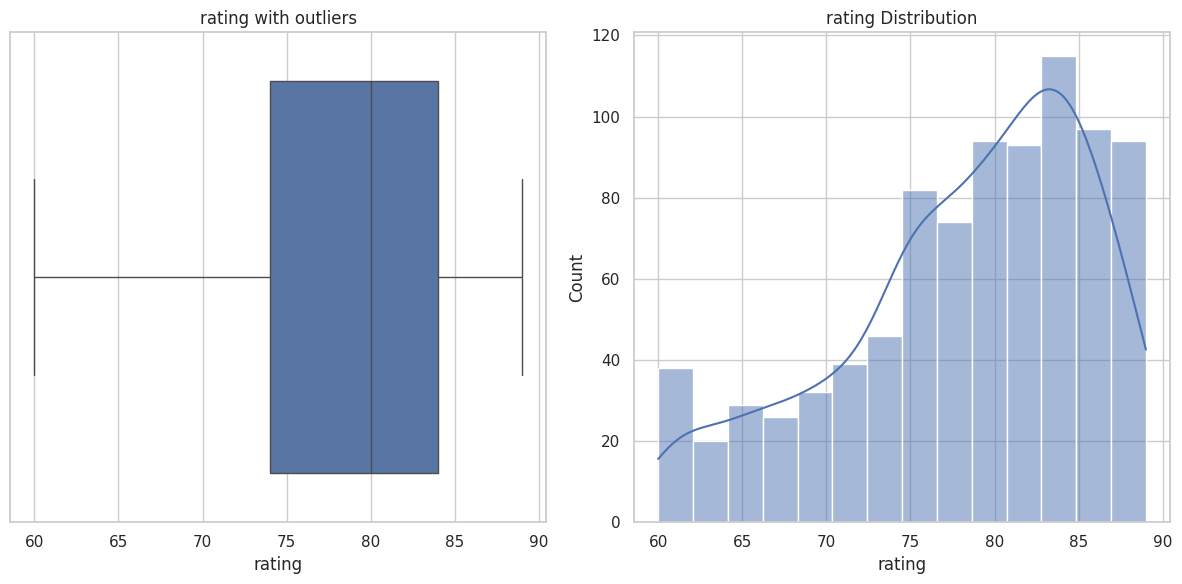

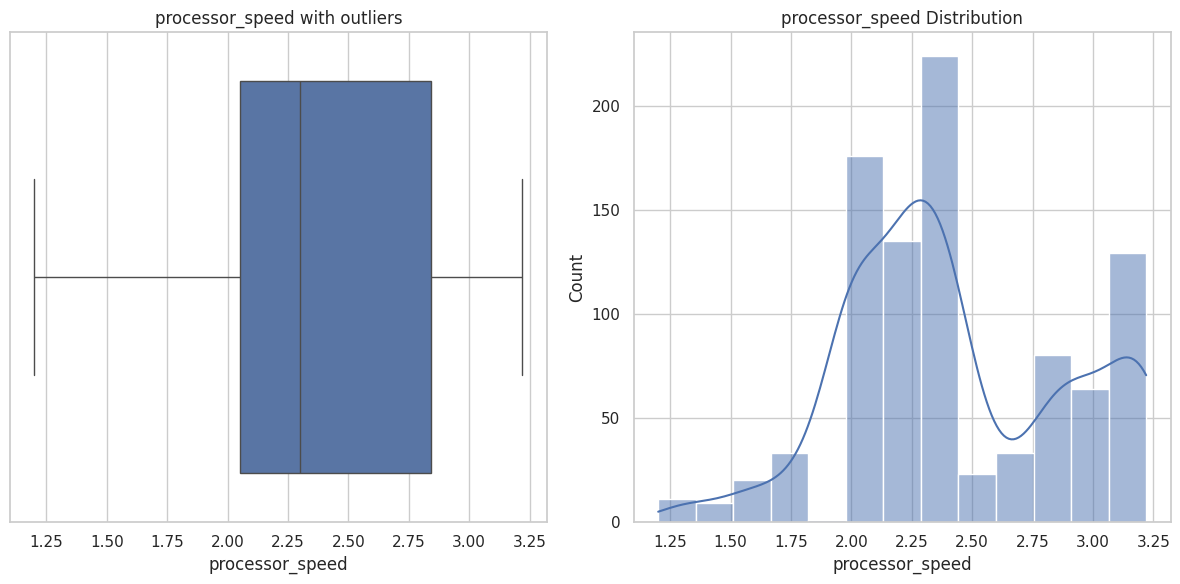

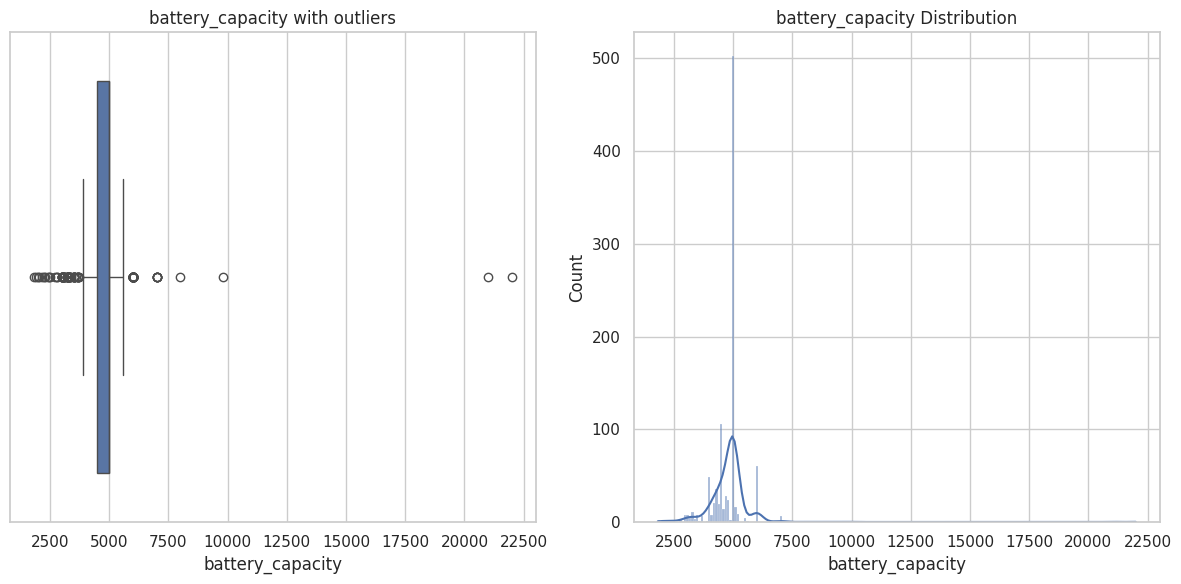

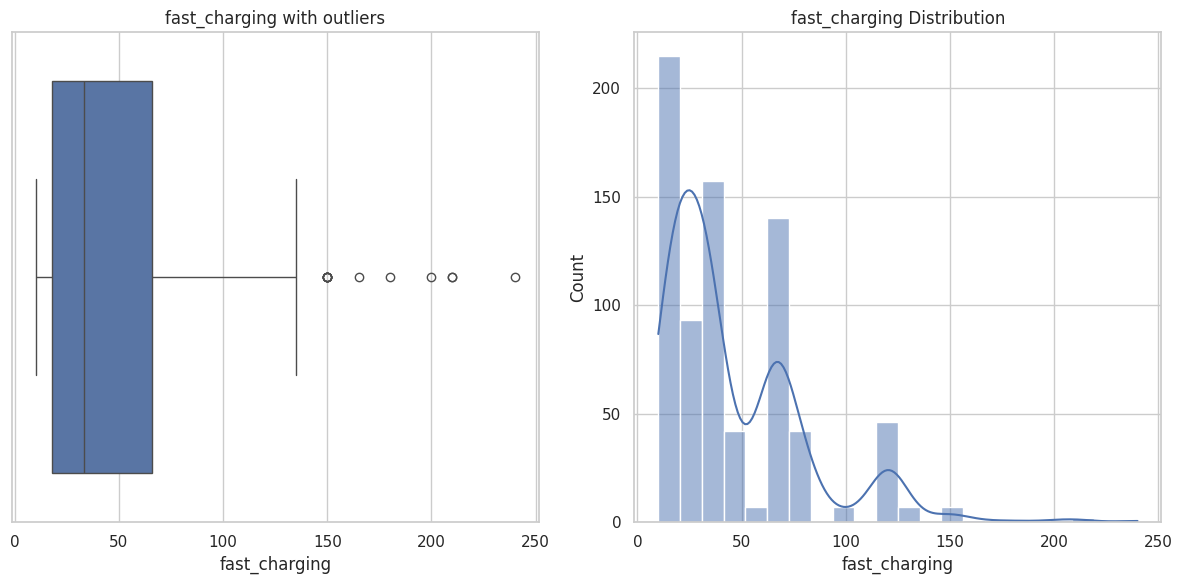

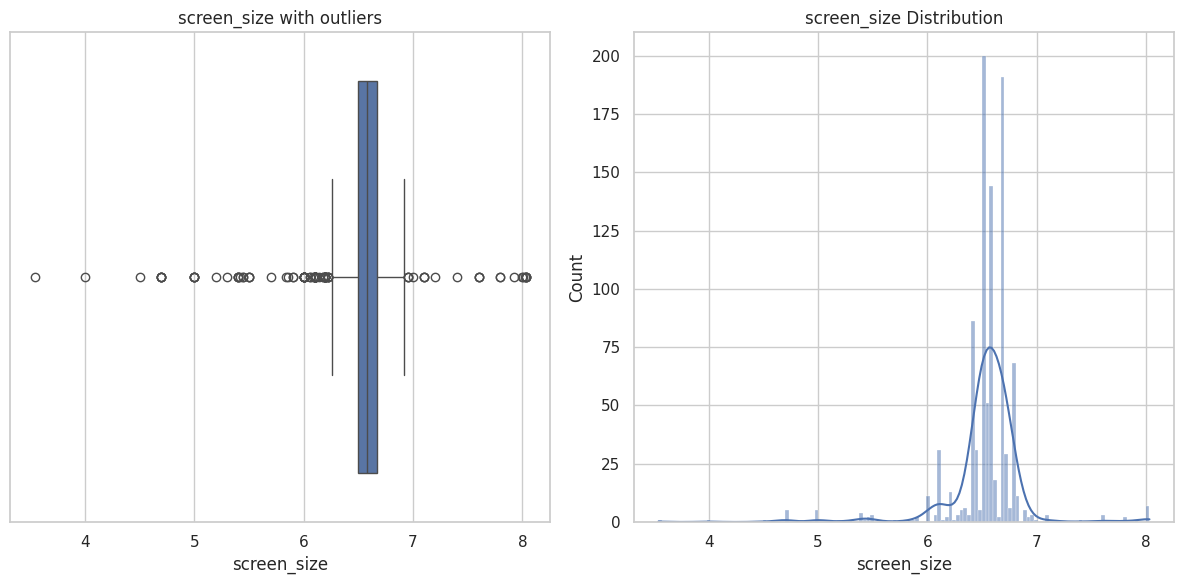

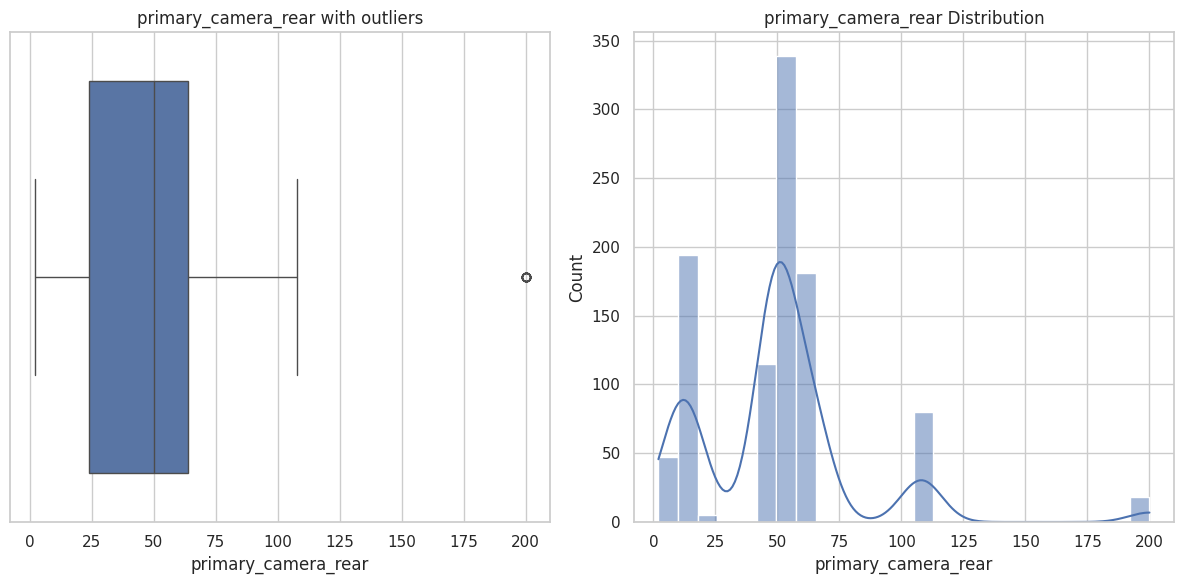

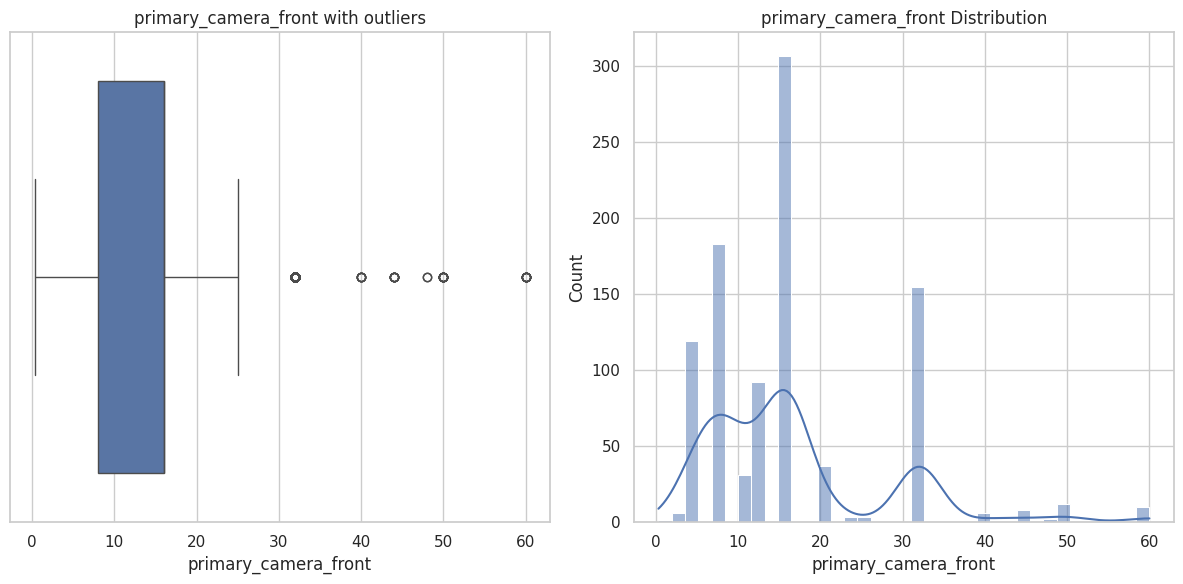

In [23]:
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot
    sns.boxplot(x=df[feature], ax=axes[0])
    axes[0].set_title(f'{feature} with outliers')

    # Plot distribution
    sns.histplot(data=df, x=feature, kde=True, ax=axes[1])
    axes[1].set_title(f'{feature} Distribution')

    plt.tight_layout()
    #fig.savefig(f'./plots/dist_with_outliers/{feature}_with_outliers.png')

Eliminarem els outliers seguint el criteri del Rang Interquartil, excepte la variable objectiu 'price'

Per tant, considerarem outliers:
* Els valors més grans que Q1 - 1.5*IQR
* Els valors més petits que Q3 + 1.5*IQR


Així doncs, marcarem els outliers detectats com a missings, i tornem a visualitzar la distribució de cada variable numèrica un cop trac 

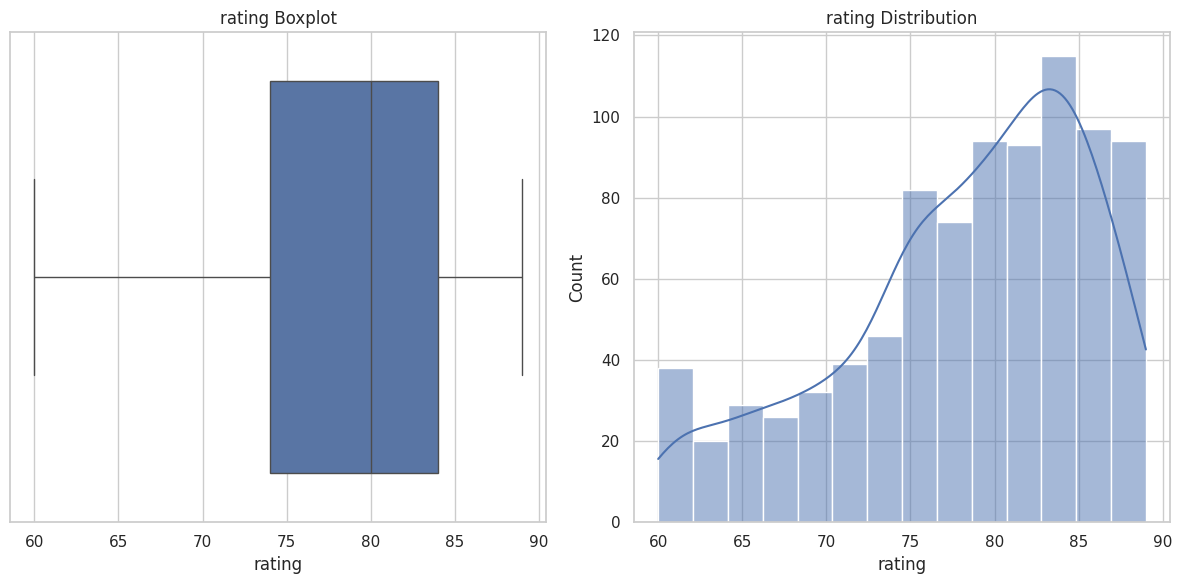

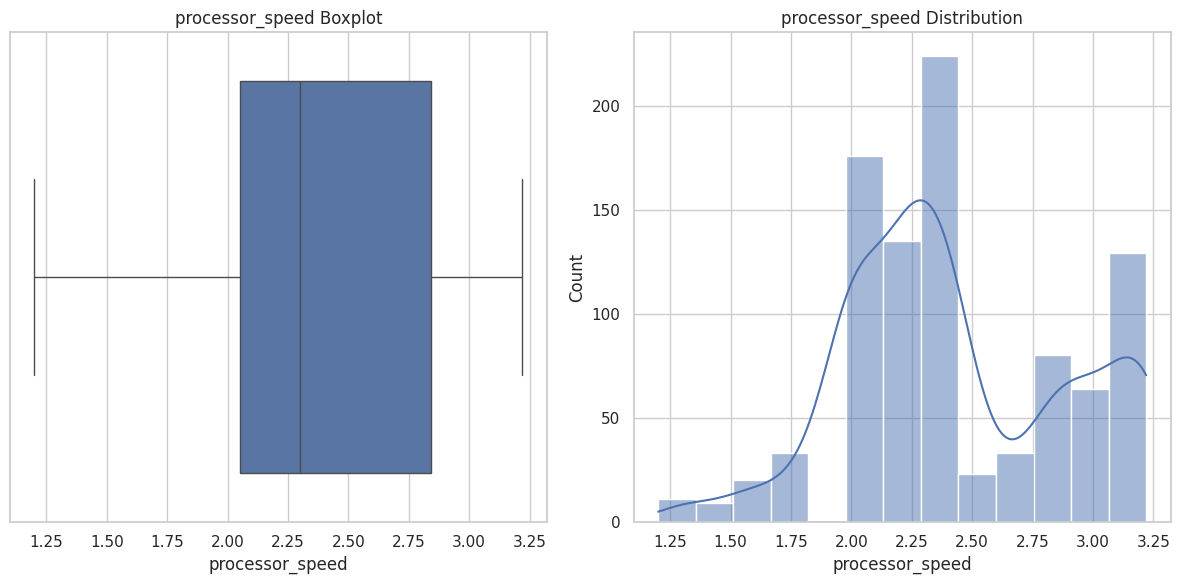

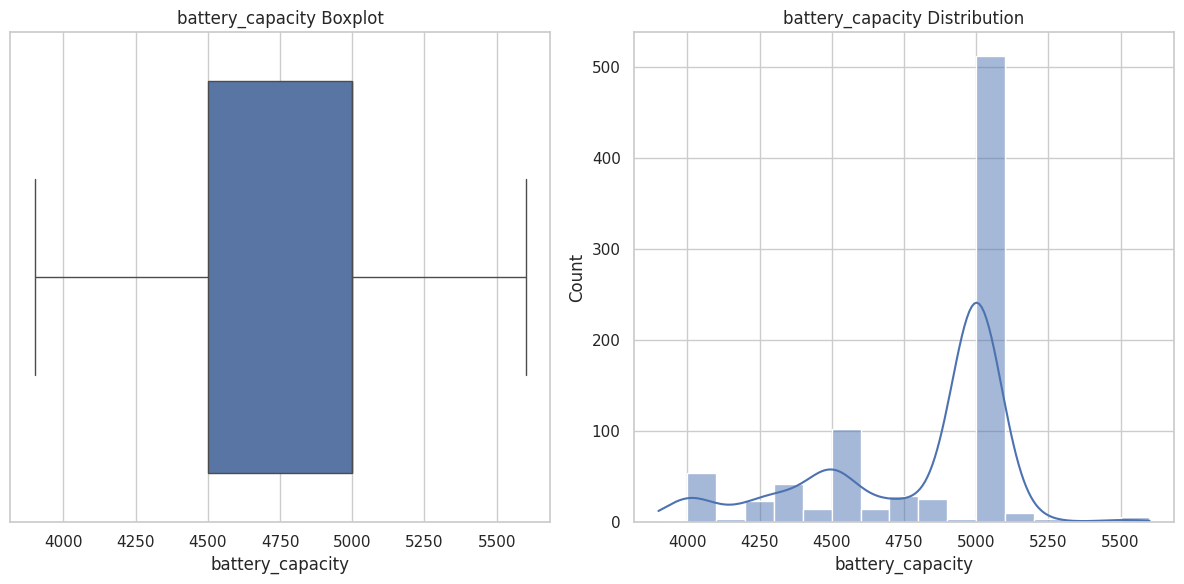

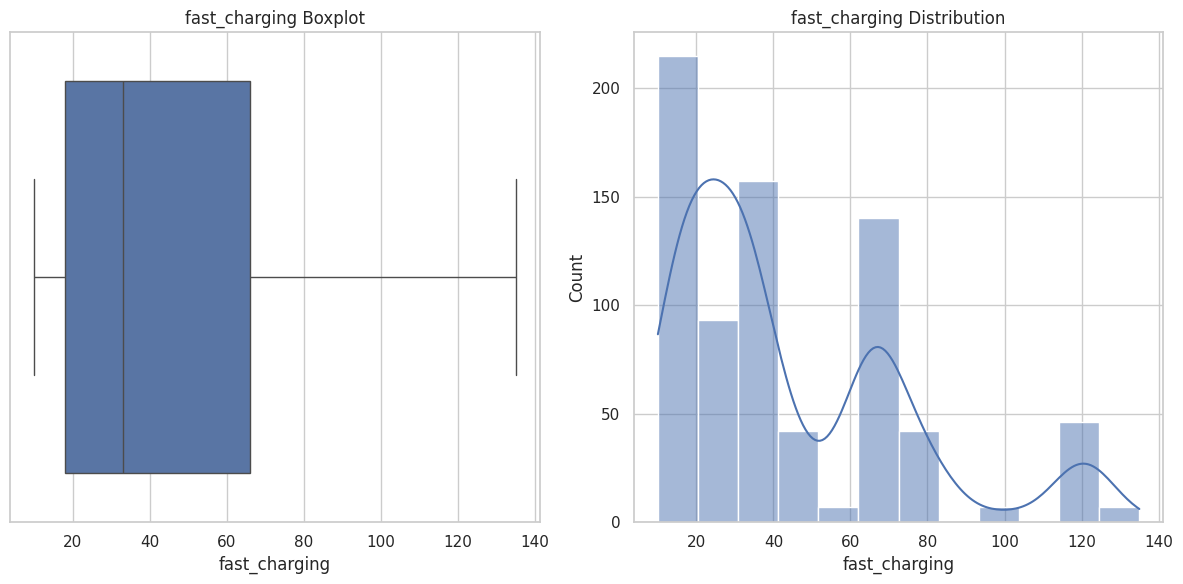

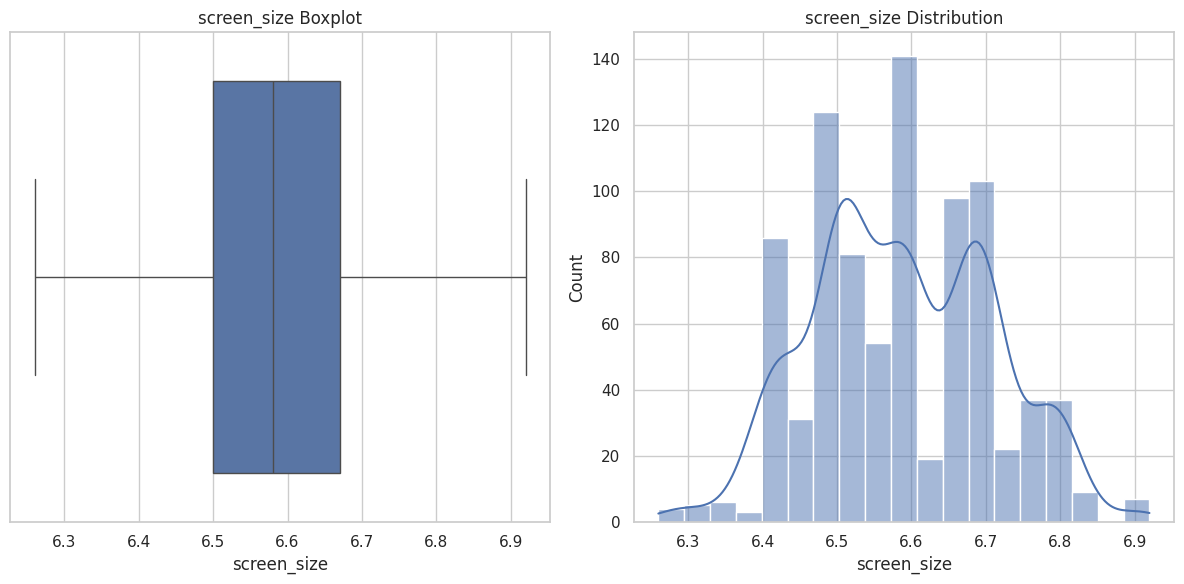

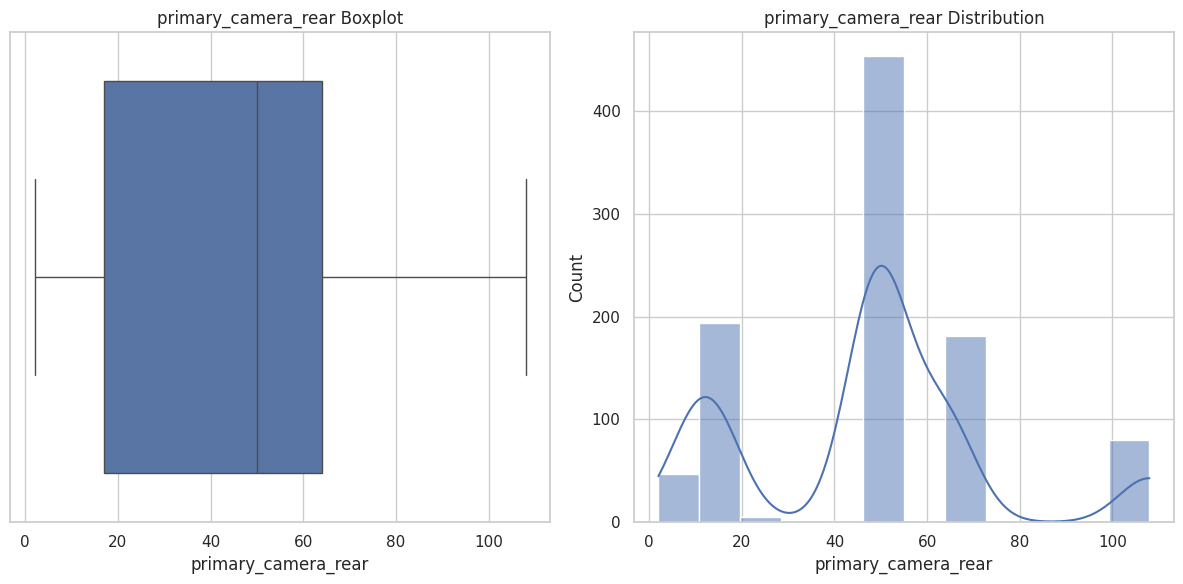

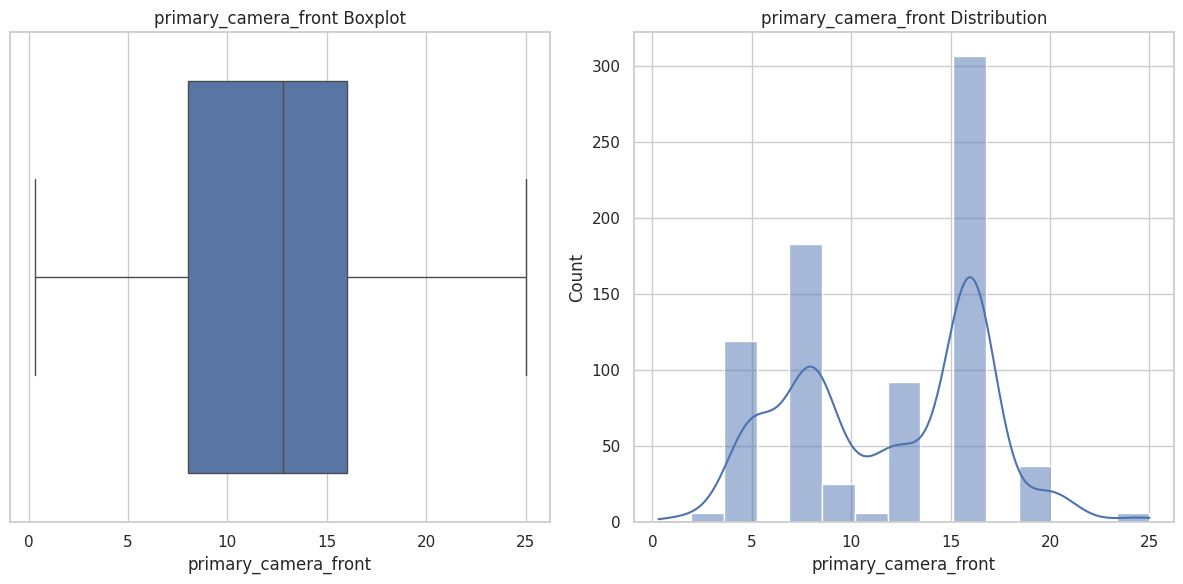

In [24]:
for feature in numerical_features:
    # Calcular IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Definir el límit inferior i superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df.loc[(df[feature] < lower_bound) | (df[feature] > upper_bound), feature] = np.nan

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot boxplot
    sns.boxplot(x=df[feature], ax=axes[0])
    axes[0].set_title(f'{feature} Boxplot')

    # Plot distribution
    sns.histplot(data=df, x=feature, kde=True, ax=axes[1])
    axes[1].set_title(f'{feature} Distribution')

    plt.tight_layout()
    #fig.savefig(f'./plots/dist_without_outliers/{feature}_without_outliers.png')

In [25]:
# Eliminar files tal que 'price' es un outlier
Q1 = df['price'].quantile(0.10)
Q3 = df['price'].quantile(0.90)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df.shape

(968, 23)

Ara, tornem a observar la distribució de 'price' i podem comprovar que els valors ja són més típics.

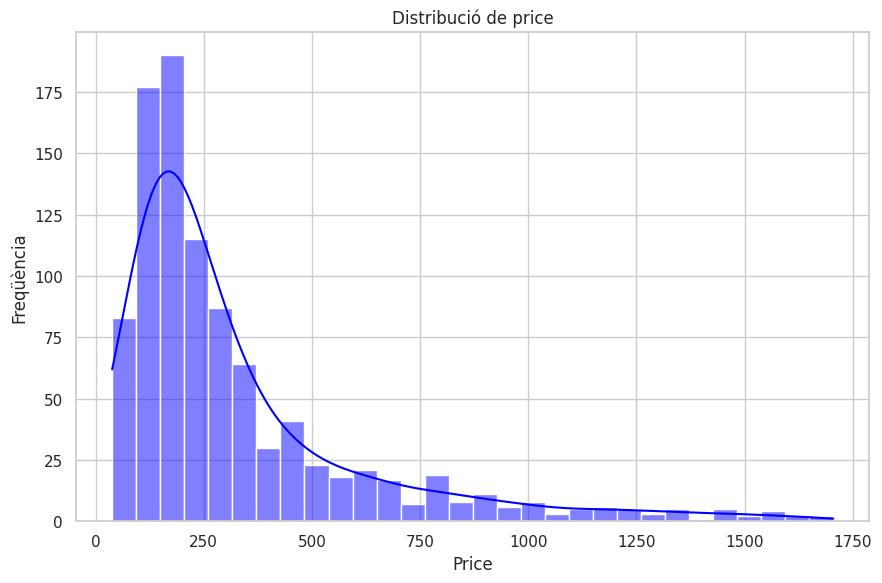

In [26]:
# Visualitzar la distribució de 'price'
plt.figure()
sns.histplot(df['price'], bins = 30, color = 'blue', edgecolor = 'white', kde = True)
plt.title('Distribució de price')
plt.xlabel('Price')
plt.ylabel('Freqüència')
plt.tight_layout()
#plt.savefig('./plots/price_distribution.png')

# 3. Remostreig

#### <span style="color:lightgreen"> Partició del dataset en Train i Test </span>

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1) 
y = df['price']

# Dividir el dataset en train y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [28]:
# Mostrar el número d'observacions y features de cada set
sets_df = pd.DataFrame(columns=['Set', 'Number of Observations', 'Number of Features'])
sets_df.loc[len(sets_df)] = ['Train', X_train.shape[0], X_train.shape[1]]
sets_df.loc[len(sets_df)] = ['Test', X_test.shape[0], X_test.shape[1]]

sets_df

,Set,Number of Observations,Number of Features
0,Train,774,22
1,Test,194,22


#### <span style="color:lightgreen"> Imputació de Missings</span>

##### Variables numèriques

In [29]:
missing_before_num = X_train[numerical_features].isnull().sum()
mean_before = X_train[numerical_features].mean()
stderr_before = X_train[numerical_features].sem()
median_before = X_train[numerical_features].median()

In [30]:
from sklearn.impute import KNNImputer

# Crear l'imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Ajustar l'imputador a les característiques numèriques de les dades d'entrenament i transformar-les
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])

# Transformar les característiques numèriques de les dades de prova utilitzant l'imputador ajustat
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

In [31]:
missing_after_num = X_train[numerical_features].isnull().sum()
mean_after = X_train[numerical_features].mean()
stderr_after = X_train[numerical_features].sem()
median_after = X_train[numerical_features].median()

In [32]:
stats_comparison_num = pd.DataFrame({
    'Feature': missing_before_num.index, 
    'Mean (old)': mean_before.values,
    'Mean': mean_after.values,
    'Std_Error (old)': stderr_before.values,
    'Std_Error': stderr_after.values,
    'Median (old)': median_before.values,
    'Median': median_after.values
})
stats_comparison_num

,Feature,Mean (old),Mean,Std_Error (old),Std_Error,Median (old),Median
0,rating,78.210450,77.744703,0.284479,0.276822,80.00,79.80
1,processor_speed,2.413930,2.416972,0.017236,0.016842,2.30,2.30
2,battery_capacity,4788.626687,4776.765633,12.630036,11.246551,5000.00,5000.00
3,fast_charging,43.356784,43.700775,1.198064,1.101546,33.00,33.00
4,screen_size,6.587692,6.591039,0.004548,0.004168,6.58,6.58
5,primary_camera_rear,47.235441,47.022351,0.951520,0.940744,50.00,50.00
6,primary_camera_front,11.935981,12.447468,0.193233,0.161762,13.00,14.00


##### Variables categòriques

In [33]:
# Guardar les dades originals
original_data = X_train.copy()

In [34]:
# Llista amb els noms de les variables categòriques que tenen almenys un missing
cat_features_missings = [feature for feature in categorical_features if X_train[feature].isnull().any()]
print(cat_features_missings)

['processor_brand', 'os', 'num_cores', 'num_front_cameras']


In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_train[categorical_features] = imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = imputer.transform(X_test[categorical_features])

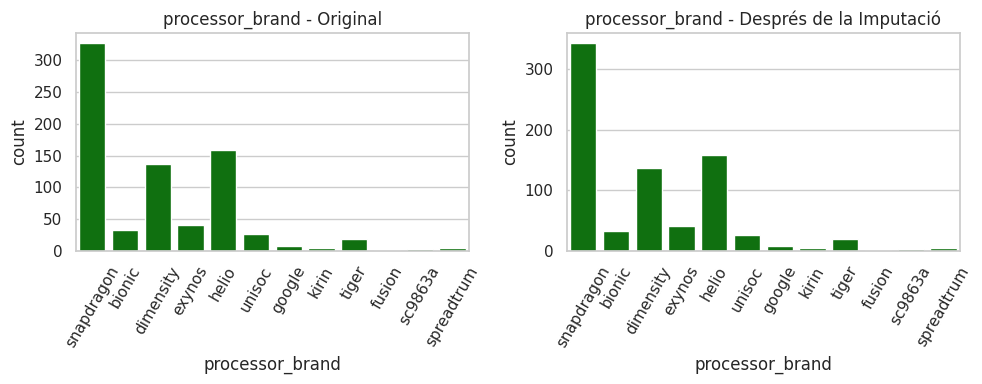

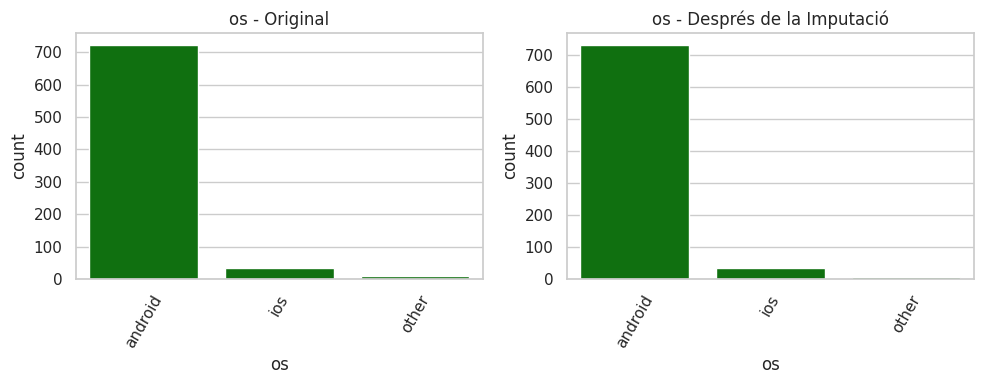

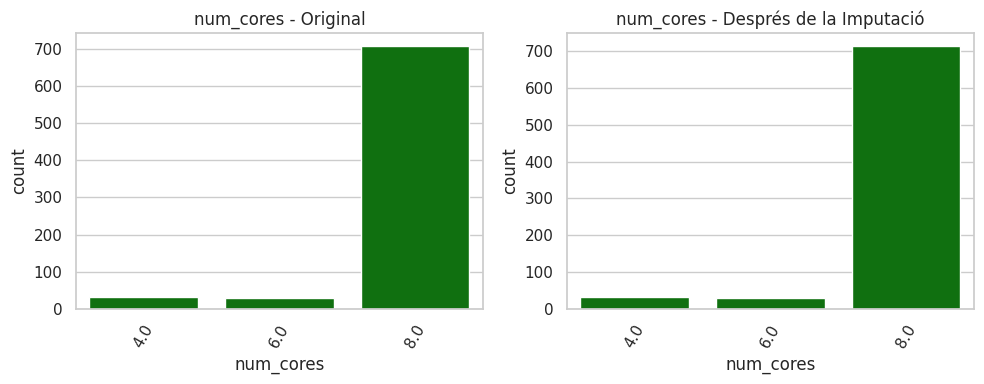

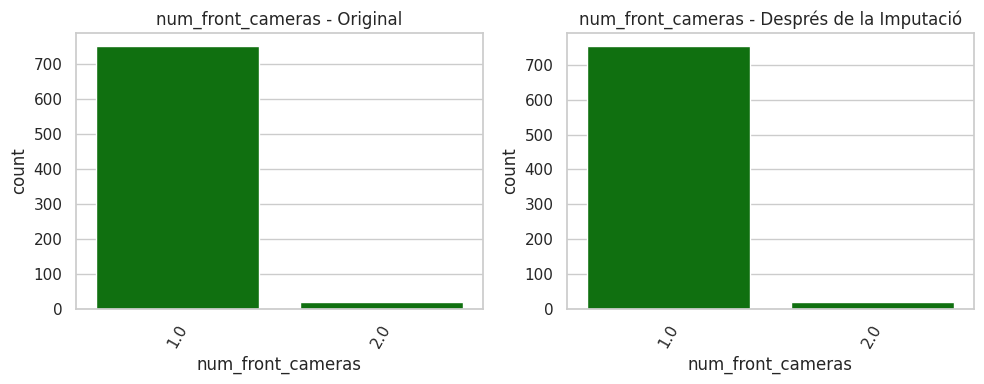

In [36]:
for feature in cat_features_missings:
    plt.figure(figsize=(10, 4))

    # Abans de la imputació (excloïm missings)
    plt.subplot(1, 2, 1)
    filtered_data = original_data[original_data[feature].notna()]
    sns.countplot(data=filtered_data, x=feature, color='green')
    plt.title(f'{feature} - Original')
    plt.xticks(rotation=60)  

    # Després de la imputació
    plt.subplot(1, 2, 2)
    sns.countplot(data=X_train, x=feature, color='green')
    plt.title(f'{feature} - Després de la Imputació')
    plt.xticks(rotation=60)  
    plt.tight_layout()  
    #plt.savefig(f'./plots/dist_moda/{feature}_moda.png')

#### <span style="color:lightgreen"> Recodificació de variables categòriques </span>

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Crear una còpia dels conjunts de dades per no modificar els originals
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Crear el codificador
le = LabelEncoder()

# Obtindre totes les categories úniques per a 'brand_name' i 'processor_brand'
all_brands = pd.concat([X_train['brand_name'], X_test['brand_name']]).dropna().unique()
all_processors = pd.concat([X_train['processor_brand'], X_test['processor_brand']]).dropna().unique()

# One-Hot Encoding per 'brand_name' i 'processor_brand'
for col, all_categories in zip(['brand_name', 'processor_brand'], [all_brands, all_processors]):
    dummies = pd.get_dummies(pd.concat([X_train[col], X_test[col]], axis=0), prefix=col, drop_first=True)
    X_train_encoded = pd.concat([X_train_encoded, dummies.loc[X_train.index]], axis=1)
    X_test_encoded = pd.concat([X_test_encoded, dummies.loc[X_test.index]], axis=1)
    X_train_encoded.drop([col], axis=1, inplace=True)
    X_test_encoded.drop([col], axis=1, inplace=True)

# Codificar les altres columnes categòriques de tipus object
for col in categorical_features:
    if col not in ['brand_name', 'processor_brand'] and X_train_encoded[col].dtype == 'object':
        le.fit(pd.concat([X_train_encoded[col], X_test_encoded[col]])) 
        X_train_encoded[col] = le.transform(X_train_encoded[col])
        X_test_encoded[col] = le.transform(X_test_encoded[col])

In [38]:
X_train_encoded.head()

,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,...,processor_brand_fusion,processor_brand_google,processor_brand_helio,processor_brand_kirin,processor_brand_mediatek,processor_brand_sc9863a,processor_brand_snapdragon,processor_brand_spreadtrum,processor_brand_tiger,processor_brand_unisoc
537,87.0,1,1,0,2,3.00,5600.0,1,68.0,6,...,False,False,False,False,False,False,True,False,False,False
167,83.0,1,1,0,2,2.84,4500.0,1,66.0,5,...,False,False,False,False,False,False,True,False,False,False
536,87.0,1,1,0,2,3.00,4431.0,1,25.0,5,...,False,False,False,False,False,False,True,False,False,False
8,85.0,1,1,0,2,2.50,4500.0,1,33.0,5,...,False,False,False,False,False,False,True,False,False,False
706,72.0,0,1,0,2,2.98,4596.0,1,80.0,4,...,False,False,False,False,False,False,False,False,False,False


#### <span style="color:lightgreen"> Normalització de variables numèriques </span>

In [39]:
from sklearn.preprocessing import StandardScaler

# Crear una còpia dels conjunts de dades per no modificar els originals
X_train_normalized = X_train_encoded.copy()
X_test_normalized = X_test_encoded.copy()

# Crear el normalitzador
scaler = StandardScaler()

# Normalitzar les columnes numèriques
X_train_normalized[numerical_features] = scaler.fit_transform(X_train_normalized[numerical_features])
X_test_normalized[numerical_features] = scaler.transform(X_test_normalized[numerical_features])

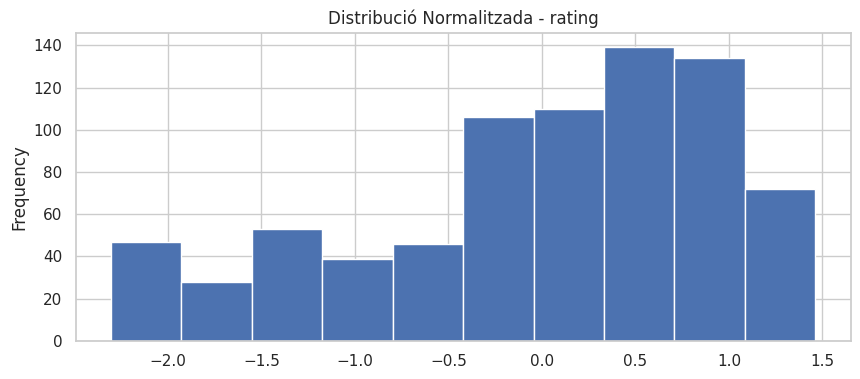

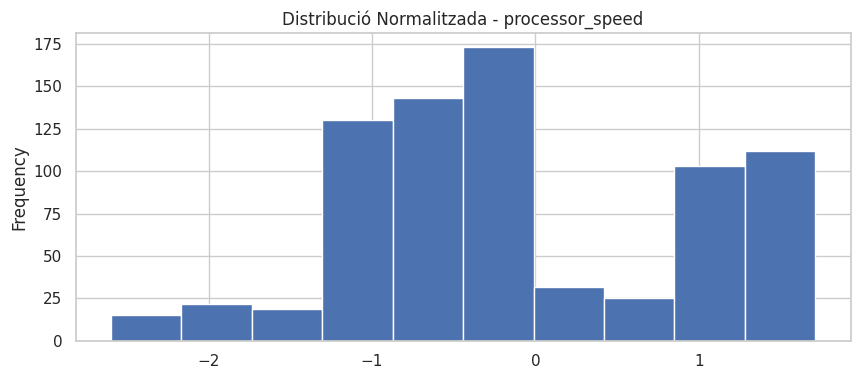

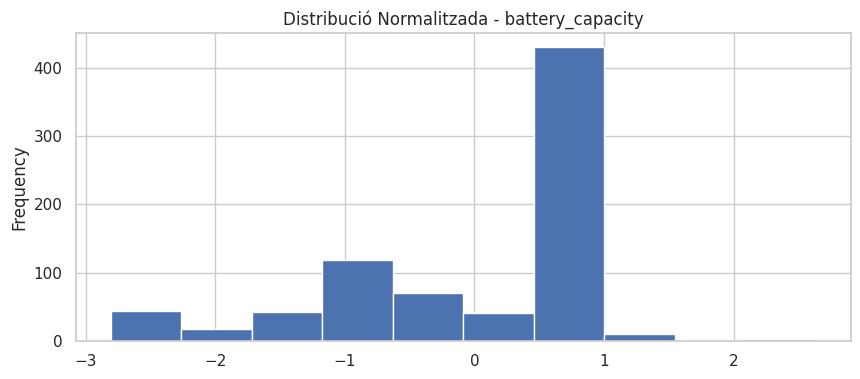

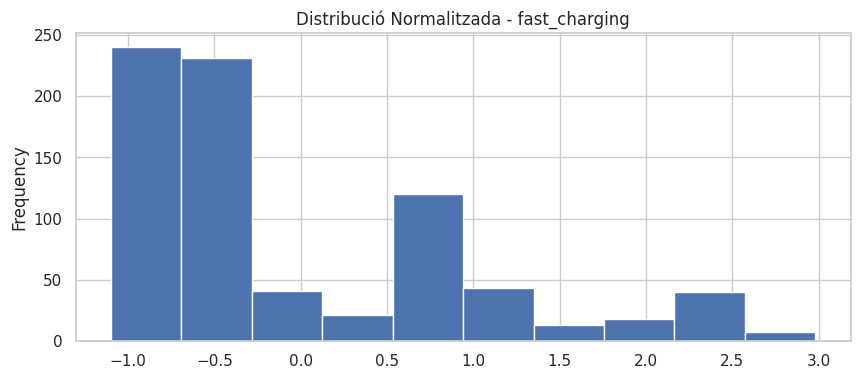

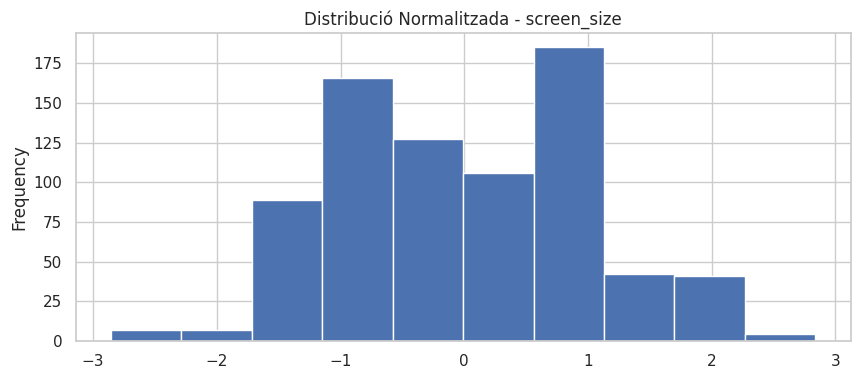

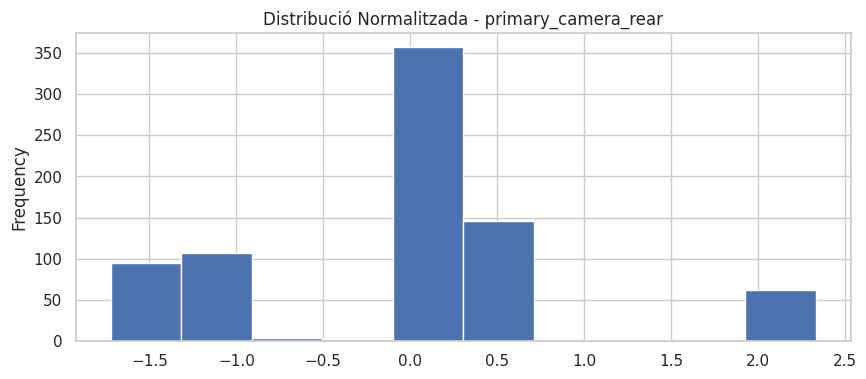

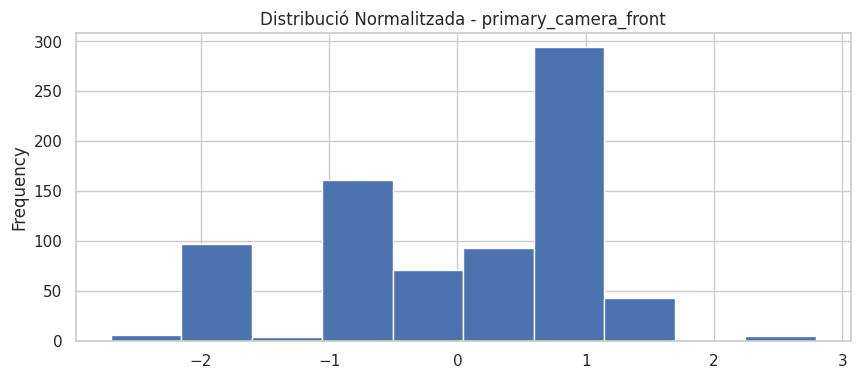

In [40]:
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    X_train_normalized[feature].plot.hist()
    plt.title(f'Distribució Normalitzada - {feature}')
    #plt.savefig(f'./plots/normalized/{feature}_normalized.png')

# 4.1 Model Lineal Base

#### <span style="color:lightgreen"> Entrenament i avaluació d'un model de regressió lineal </span>

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Crear el model de regressió lineal
lr_model = LinearRegression()

# Entrenar el model
lr_model.fit(X_train_normalized, y_train)

# Fes prediccions amb les dades de test i train
y_pred = lr_model.predict(X_test_normalized)
y_pred_train = lr_model.predict(X_train_normalized)

# Avaluar el model
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 21450.661325009387
MAE: 106.29735230473149
R²: 0.744707061472611


#### <span style="color:lightgreen"> Interpretació dels resultats obtinguts (mètriques de classificació, coeficients, etc.) </span>

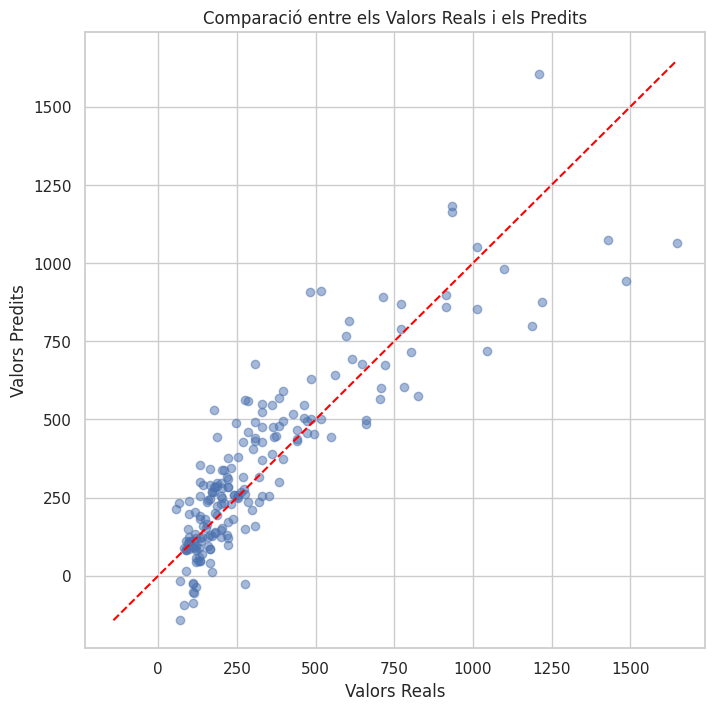

In [42]:
def linearity(model, X, y):
    """
    Funció per visualitzar la linealitat entre els valors predits i els reals.
    """
    # Generar prediccions
    y_pred = model.predict(X)

    # Crear un gràfic de dispersió dels valors reals vs. predits
    plt.figure(figsize=(8, 8))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.title('Comparació entre els Valors Reals i els Predits')
    plt.xlabel('Valors Reals')
    plt.ylabel('Valors Predits')

    # Dibuixar la línia diagonal que representa la perfecta predicció
    max_val = max(np.max(y), np.max(y_pred))
    min_val = min(np.min(y), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    plt.grid(True)
    #plt.savefig('images/linearmodel.png')
    plt.show()
    
linearity(lr_model, X_test_normalized, y_test)

# 4.2 EXTRA

### Trobar el millor model per aquest problema de regressió mitjançant validació creuada

In [43]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un diccionari de models a avaluar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(max_iter=10000),
    'Lasso Regression': Lasso(max_iter=10000),
    'Random Forest': RandomForestRegressor(),
    'K-Nearest Neighbors': make_pipeline(StandardScaler(), KNeighborsRegressor()) 
}

# Configuració de la validació creuada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Avaluar cada model fent servir el R2 Score
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train_normalized, y_train, cv=kf, scoring='r2')
    results[name] = cv_results.mean()  

# Trobar el model que dona un millor resultat de R2
best_model = max(results, key=results.get)
print("Millor model:", best_model)
print("R2-score de cada model:", results)


Millor model: Random Forest
R2-score de cada model: {'Linear Regression': 0.6931393302651644, 'Ridge Regression': 0.6977001136988082, 'Lasso Regression': 0.6762224323036737, 'Random Forest': 0.8283224949676538, 'K-Nearest Neighbors': 0.7285839849050373}


In [44]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el model
model = RandomForestRegressor(random_state=42)

# Definir els hiperparàmetres a provar
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='r2', verbose=2, n_jobs=-1)

# Ajustar el Grid Search als dades
grid_search.fit(X_train_normalized, y_train)

# Imprimir els millors hiperparàmetres trobats
print(f'Millors hiperparàmetres: {grid_search.best_params_}')
print(f'Millor score: {grid_search.best_score_}')'''

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Definir el model\nmodel = RandomForestRegressor(random_state=42)\n\n# Definir els hiperparàmetres a provar\nparam_grid = {\n    'n_estimators': [100, 200, 300, 400, 500],\n    'max_depth': [None, 10, 20, 30, 40, 50],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\n\n# Crear el Grid Search\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='r2', verbose=2, n_jobs=-1)\n\n# Ajustar el Grid Search als dades\ngrid_search.fit(X_train_normalized, y_train)\n\n# Imprimir els millors hiperparàmetres trobats\nprint(f'Millors hiperparàmetres: {grid_search.best_params_}')\nprint(f'Millor score: {grid_search.best_score_}')"

El codi anterior té un cost computacional molt elevat, per tant, com que els resultats són reproductibles (random_state), els hiperparàmetres òptims obtinguts són els següents amb un valor d'R2 de 0.82832:
-  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

En cas que es vulgui executar la cel·la per tal de comprovar-ho, simplement cal descomentar-la.

Creem el model i treiem les mètriques ja que després ho utilitzem per comparar-lo amb els altres models creats.

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Crea el model de Random Forest
rf_model = RandomForestRegressor(bootstrap = True, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)

# Entrenar el model
rf_model.fit(X_train_normalized, y_train)

# Fes prediccions amb les dades de test i train
rf_y_pred = rf_model.predict(X_test_normalized)
rf_y_pred_train = rf_model.predict(X_train_normalized)

# Avaluar el model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mse_train = mean_squared_error(y_train, rf_y_pred_train)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_r2_train = r2_score(y_train, rf_y_pred_train)

print(f"MSE: {rf_mse}")
print(f"R²: {rf_r2}")

MSE: 15269.463461140555
R²: 0.818271980631839


# 5. Perceptró Multicapa

In [46]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

2024-05-07 15:38:33.299333: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 15:38:33.381627: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 15:38:33.682082: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 15:38:34.837372: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [47]:
# Funció per construir el model
def build_model(X_train, n_layers, n_units, learning_rate = 0.001):
    model = Sequential()
    model.add(Dense(n_units, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(n_layers):
        model.add(Dense(n_units, activation='relu'))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Funció per a visualitzar les corbes d'aprenentatge
def plot_curves(history, distinct):
    plt.plot(history.history['mean_squared_error'], label='Train MSE')
    plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
    plt.title('MSE Curves')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    #plt.savefig(f'images/loss_mlp_{distinct}.png')
    plt.show()

Epoch 1/1000


/home/violeta/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-07 15:38:35.552441: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


11/11 - 1s - 67ms/step - loss: 195980.9844 - mean_squared_error: 195980.9844 - val_loss: 176467.4688 - val_mean_squared_error: 176467.4688
Epoch 2/1000
11/11 - 0s - 3ms/step - loss: 193883.4531 - mean_squared_error: 193883.4531 - val_loss: 174424.0469 - val_mean_squared_error: 174424.0469
Epoch 3/1000
11/11 - 0s - 3ms/step - loss: 191737.0625 - mean_squared_error: 191737.0625 - val_loss: 172338.4531 - val_mean_squared_error: 172338.4531
Epoch 4/1000
11/11 - 0s - 3ms/step - loss: 189559.1875 - mean_squared_error: 189559.1875 - val_loss: 170172.9688 - val_mean_squared_error: 170172.9688
Epoch 5/1000
11/11 - 0s - 3ms/step - loss: 187299.7188 - mean_squared_error: 187299.7188 - val_loss: 167923.8906 - val_mean_squared_error: 167923.8906
Epoch 6/1000
11/11 - 0s - 3ms/step - loss: 184869.5000 - mean_squared_error: 184869.5000 - val_loss: 165618.0625 - val_mean_squared_error: 165618.0625
Epoch 7/1000
11/11 - 0s - 3ms/step - loss: 182440.7812 - mean_squared_error: 182440.7812 - val_loss: 16317

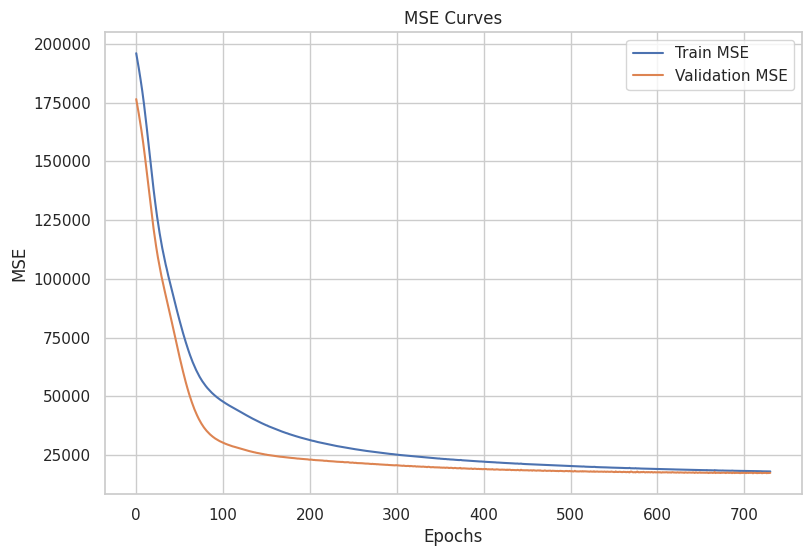

In [48]:
n_layers = 0
n_units = 32

# Entrenar el model
model_1 = build_model(X_train_normalized, n_layers, n_units, learning_rate=0.001)
early_stopping_1 = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_1 = model_1.fit(X_train_normalized, y_train, epochs=1000, batch_size=64, validation_split=0.1, verbose=2, callbacks=[early_stopping_1])

# Avaluar el model
y_train_pred_1 = model_1.predict(X_train_normalized)
y_test_pred_1 = model_1.predict(X_test_normalized)

train_mse_1 = mean_squared_error(y_train, y_train_pred_1)
test_mse_1 = mean_squared_error(y_test, y_test_pred_1)
train_r2_1 = r2_score(y_train, y_train_pred_1)
test_r2_1 = r2_score(y_test, y_test_pred_1)

print('Training MSE: {:.4f}'.format(train_mse_1))
print('Testing MSE: {:.4f}'.format(test_mse_1))
print('Training R-squared: {:.4f}'.format(train_r2_1))
print('Testing R-squared: {:.4f}'.format(test_r2_1))

# Visualitzar les corbes d'aprenentatge
plot_curves(history_1, str(1))

/home/violeta/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 - 5s - 472ms/step - loss: 197817.2656 - mean_squared_error: 197817.2656 - val_loss: 179203.5000 - val_mean_squared_error: 179203.5000
Epoch 2/1000
11/11 - 0s - 5ms/step - loss: 193209.6250 - mean_squared_error: 193209.6250 - val_loss: 146245.0312 - val_mean_squared_error: 146245.0312
Epoch 3/1000
11/11 - 0s - 5ms/step - loss: 152505.3281 - mean_squared_error: 152505.3281 - val_loss: 130499.0547 - val_mean_squared_error: 130499.0547
Epoch 4/1000
11/11 - 0s - 5ms/step - loss: 128795.2734 - mean_squared_error: 128795.2734 - val_loss: 100222.5781 - val_mean_squared_error: 100222.5781
Epoch 5/1000
11/11 - 0s - 5ms/step - loss: 91053.7109 - mean_squared_error: 91053.7109 - val_loss: 55846.8398 - val_mean_squared_error: 55846.8398
Epoch 6/1000
11/11 - 0s - 4ms/step - loss: 69213.6328 - mean_squared_error: 69213.6328 - val_loss: 64979.6992 - val_mean_squared_error: 64979.6992
Epoch 7/1000
11/11 - 0s - 5ms/step - loss: 65821.2891 - mean_squared_error: 65821.2891 - val_loss: 3

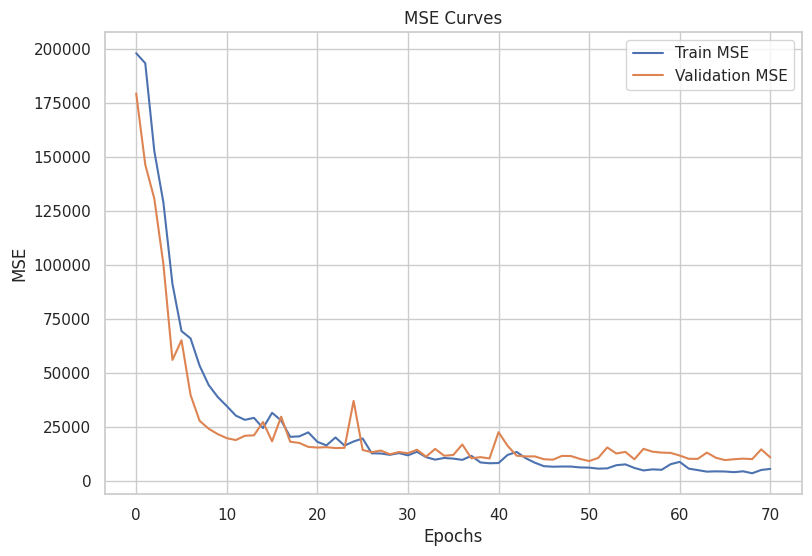

In [49]:
n_layers = 31
n_units = 64

# Entrenar el model
model_2 = build_model(X_train_normalized, n_layers, n_units, learning_rate=0.001)
early_stopping_2 = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_2 = model_2.fit(X_train_normalized, y_train, epochs=1000, batch_size=64, validation_split=0.1, verbose=2, callbacks=[early_stopping_2])

# Avaluar el model
y_train_pred_2 = model_2.predict(X_train_normalized)
y_test_pred_2 = model_2.predict(X_test_normalized)

train_mse_2 = mean_squared_error(y_train, y_train_pred_2)
test_mse_2 = mean_squared_error(y_test, y_test_pred_2)
train_r2_2 = r2_score(y_train, y_train_pred_2)
test_r2_2 = r2_score(y_test, y_test_pred_2)

print('Training MSE: {:.4f}'.format(train_mse_2))
print('Testing MSE: {:.4f}'.format(test_mse_2))
print('Training R-squared: {:.4f}'.format(train_r2_2))
print('Testing R-squared: {:.4f}'.format(test_r2_2))

# Visualitzar les corbes d'aprenentatge
plot_curves(history_2, str(2))

/home/violeta/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
3/3 - 5s - 2s/step - loss: 197844.6406 - mean_squared_error: 197844.6406 - val_loss: 179307.6562 - val_mean_squared_error: 179307.6562
Epoch 2/1000
3/3 - 0s - 15ms/step - loss: 197820.0469 - mean_squared_error: 197820.0469 - val_loss: 179268.2812 - val_mean_squared_error: 179268.2812
Epoch 3/1000
3/3 - 0s - 15ms/step - loss: 197763.5000 - mean_squared_error: 197763.5000 - val_loss: 179165.3906 - val_mean_squared_error: 179165.3906
Epoch 4/1000
3/3 - 0s - 15ms/step - loss: 197586.8906 - mean_squared_error: 197586.8906 - val_loss: 178727.6562 - val_mean_squared_error: 178727.6562
Epoch 5/1000
3/3 - 0s - 15ms/step - loss: 196741.9844 - mean_squared_error: 196741.9844 - val_loss: 176258.3750 - val_mean_squared_error: 176258.3750
Epoch 6/1000
3/3 - 0s - 15ms/step - loss: 191979.6719 - mean_squared_error: 191979.6719 - val_loss: 161700.9688 - val_mean_squared_error: 161700.9688
Epoch 7/1000
3/3 - 0s - 15ms/step - loss: 166299.2656 - mean_squared_error: 166299.2656 - val_loss: 12

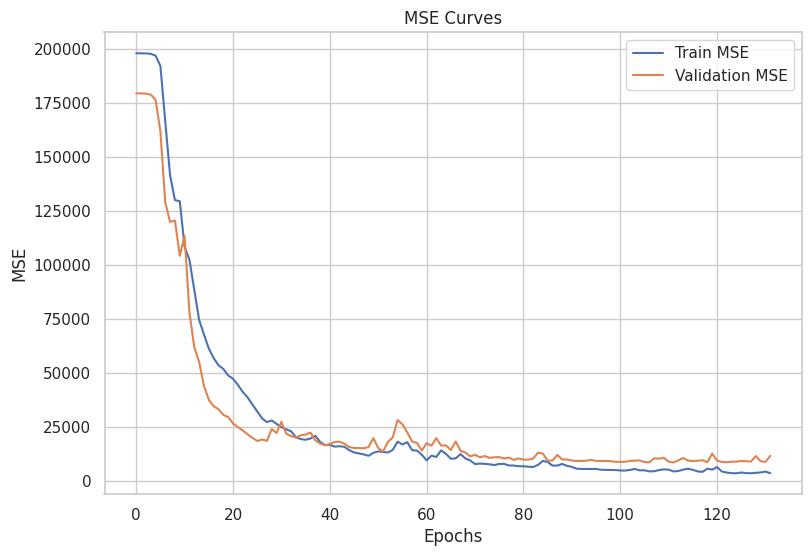

In [50]:
n_layers = 31
n_units = 64

# Entrenar el model
model_3 = build_model(X_train_normalized, n_layers, n_units, learning_rate=0.001)
early_stopping_3 = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_3 = model_3.fit(X_train_normalized, y_train, epochs=1000, batch_size=256, validation_split=0.1, verbose=2, callbacks=[early_stopping_3])

# Avaluar el model
y_train_pred_3 = model_3.predict(X_train_normalized)
y_test_pred_3 = model_3.predict(X_test_normalized)

train_mse_3 = mean_squared_error(y_train, y_train_pred_3)
test_mse_3 = mean_squared_error(y_test, y_test_pred_3)
train_r2_3 = r2_score(y_train, y_train_pred_3)
test_r2_3 = r2_score(y_test, y_test_pred_3)

print('Training MSE: {:.4f}'.format(train_mse_3))
print('Testing MSE: {:.4f}'.format(test_mse_3))
print('Training R-squared: {:.4f}'.format(train_r2_3))
print('Testing R-squared: {:.4f}'.format(test_r2_3))

# Visualitzar les corbes d'aprenentatge
plot_curves(history_3, str(3))

/home/violeta/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
3/3 - 10s - 3s/step - loss: 197845.5156 - mean_squared_error: 197845.5156 - val_loss: 179309.8438 - val_mean_squared_error: 179309.8438
Epoch 2/1000
3/3 - 0s - 27ms/step - loss: 197824.3750 - mean_squared_error: 197824.3750 - val_loss: 179281.0625 - val_mean_squared_error: 179281.0625
Epoch 3/1000
3/3 - 0s - 26ms/step - loss: 197786.8438 - mean_squared_error: 197786.8438 - val_loss: 179220.7656 - val_mean_squared_error: 179220.7656
Epoch 4/1000
3/3 - 0s - 26ms/step - loss: 197697.2812 - mean_squared_error: 197697.2812 - val_loss: 179024.7188 - val_mean_squared_error: 179024.7188
Epoch 5/1000
3/3 - 0s - 25ms/step - loss: 197307.9062 - mean_squared_error: 197307.9062 - val_loss: 177456.7188 - val_mean_squared_error: 177456.7188
Epoch 6/1000
3/3 - 0s - 26ms/step - loss: 192430.7969 - mean_squared_error: 192430.7969 - val_loss: 154142.1719 - val_mean_squared_error: 154142.1719
Epoch 7/1000
3/3 - 0s - 27ms/step - loss: 178491.4844 - mean_squared_error: 178491.4844 - val_loss: 1

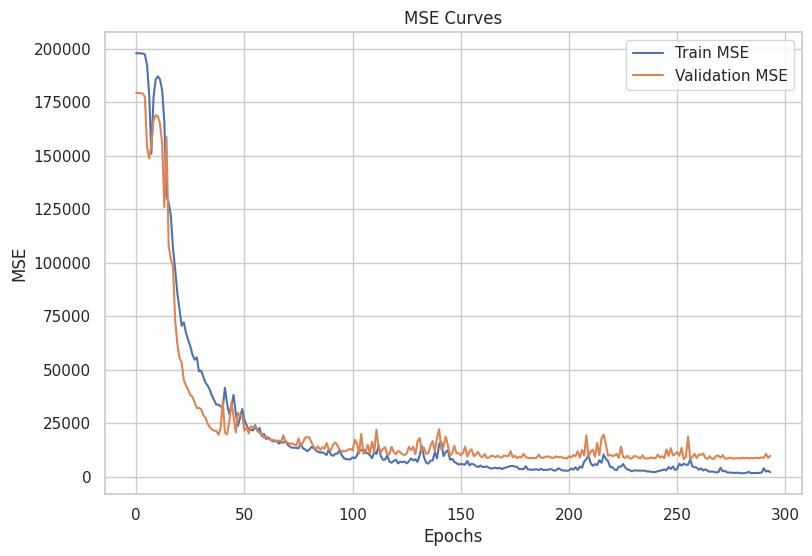

In [51]:
n_layers = 63
n_units = 128

# Entrenar el model
model_4 = build_model(X_train_normalized, n_layers, n_units, learning_rate=0.0005)
early_stopping_4 = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
history_4 = model_4.fit(X_train_normalized, y_train, epochs=1000, batch_size=256, validation_split=0.1, verbose=2, callbacks=[early_stopping_4])

# Avaluar el model
y_train_pred_4 = model_4.predict(X_train_normalized)
y_test_pred_4 = model_4.predict(X_test_normalized)

train_mse_4 = mean_squared_error(y_train, y_train_pred_4)
test_mse_4 = mean_squared_error(y_test, y_test_pred_4)
train_r2_4 = r2_score(y_train, y_train_pred_4)
test_r2_4 = r2_score(y_test, y_test_pred_4)

print('Training MSE: {:.4f}'.format(train_mse_4))
print('Testing MSE: {:.4f}'.format(test_mse_4))
print('Training R-squared: {:.4f}'.format(train_r2_4))
print('Testing R-squared: {:.4f}'.format(test_r2_4))

# Visualitzar les corbes d'aprenentatge
plot_curves(history_4, str(4))

In [52]:
from sklearn.model_selection import cross_val_score
from scikeras.wrappers import KerasRegressor

# Calcular la mitjana de la validació creuada per a la regressió linial i per a Random Forest
cv_lr = cross_val_score(lr_model, X_train_normalized, y_train, scoring = 'r2').mean()
cv_rf = cross_val_score(rf_model, X_train_normalized, y_train, scoring = 'r2').mean()

# Per a poder utilitzar la validació creuada de sklearn primer hem de passar els MLP's a MLP's que entengui sklearn
keras_1 = KerasRegressor(model = model_1, epochs=1000, batch_size=64, validation_split=0.1, verbose=2, callbacks=[early_stopping_1])
keras_2 = KerasRegressor(model = model_2, epochs=1000, batch_size=64, validation_split=0.1, verbose=2, callbacks=[early_stopping_2])
keras_3 = KerasRegressor(model = model_3, epochs=1000, batch_size=256, validation_split=0.1, verbose=2, callbacks=[early_stopping_3])
keras_4 = KerasRegressor(model = model_4, epochs=1000, batch_size=256, validation_split=0.1, verbose=2, callbacks=[early_stopping_4])

# Calcular les mitjanes de validació creuada per a els MLP's
cv_mlp_1 = cross_val_score(keras_1, X_train_normalized, y_train, scoring = 'r2').mean()
cv_mlp_2 = cross_val_score(keras_2, X_train_normalized, y_train, scoring = 'r2').mean()
cv_mlp_3 = cross_val_score(keras_3, X_train_normalized, y_train, scoring = 'r2').mean()
cv_mlp_4 = cross_val_score(keras_4, X_train_normalized, y_train, scoring = 'r2').mean()

Epoch 1/1000
9/9 - 0s - 50ms/step - loss: 16634.1914 - mean_squared_error: 16634.1914 - val_loss: 18185.9824 - val_mean_squared_error: 18185.9824
Epoch 2/1000
9/9 - 0s - 3ms/step - loss: 16595.3320 - mean_squared_error: 16595.3320 - val_loss: 18397.9434 - val_mean_squared_error: 18397.9434
Epoch 3/1000
9/9 - 0s - 3ms/step - loss: 16578.6875 - mean_squared_error: 16578.6875 - val_loss: 18579.1855 - val_mean_squared_error: 18579.1855
Epoch 4/1000
9/9 - 0s - 3ms/step - loss: 16565.8398 - mean_squared_error: 16565.8398 - val_loss: 18529.5137 - val_mean_squared_error: 18529.5137
Epoch 5/1000
9/9 - 0s - 3ms/step - loss: 16568.1484 - mean_squared_error: 16568.1484 - val_loss: 18387.0957 - val_mean_squared_error: 18387.0957
Epoch 6/1000
9/9 - 0s - 3ms/step - loss: 16548.9219 - mean_squared_error: 16548.9219 - val_loss: 18401.5098 - val_mean_squared_error: 18401.5098
Epoch 7/1000
9/9 - 0s - 3ms/step - loss: 16531.3691 - mean_squared_error: 16531.3691 - val_loss: 18488.0430 - val_mean_squared_er

In [53]:
# Crear el diccionari amb les dades que volem per a la taula de comparació
data = {
    'Model type': ['Linear Regression', 'Random Forest', 'MLP nº1', 'MLP nº2', 'MLP nº3', 'MLP nº4'],
    'Training R²': [r2_train, rf_r2_train, train_r2_1, train_r2_2, train_r2_3, train_r2_4],
    'Cross validation R²': [ cv_lr, cv_rf, cv_mlp_1, cv_mlp_2, cv_mlp_3, cv_mlp_4],
    'Test R²':[r2, rf_r2, test_r2_1, test_r2_2, test_r2_3, test_r2_4],
    'Training MSE': [mse_train, rf_mse_train, train_mse_1, train_mse_2, train_mse_3, train_mse_4],
    'Test MSE': [mse, rf_mse, test_mse_1, test_mse_2, test_mse_3, test_mse_4]
}

# Generar un dataframe de pandas amb aquestes dades
metrics = pd.DataFrame(data)
metrics
#metrics.to_latex()

,Model type,Training R²,Cross validation R²,Test R²,Training MSE,Test MSE
0,Linear Regression,0.783105,0.702876,0.744707,19206.790850,21450.661325
1,Random Forest,0.979429,0.830679,0.818272,1821.625204,15269.463461
2,MLP nº1,0.796029,0.794739,0.786980,18062.367062,17898.744790
3,MLP nº2,0.937071,0.902154,0.875237,5572.611190,10483.053301
4,MLP nº3,0.943224,0.940944,0.850292,5027.714449,12579.019862
5,MLP nº4,0.957004,0.945088,0.828022,3807.418897,14450.237648


El model escolllit finalment és el perceptró multicapa nº3 seguint l'execució que es mostra a l'informe. Ara bé, després de fer altres execucions els model nº2 i nº4 a vegades prediuen millor.